# Package Installs and Directory Path

In [ ]:
# Install the different libraries we need
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.4 MB/s 
  Created wheel for cairocffi: filename=cairocff

In [ ]:
# Import libraries
from ts2vg import HorizontalVG
from ts2vg import NaturalVG
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount google colab -- This will change for everyone who uses this code
import os
from google.colab import drive

drive.mount('/content/drive')

directory_path = '/content/drive/My Drive/Colab Notebooks/Fall 2022/5374/Homework Assignments/Projects/Project 2/Files/Unzipped'
# directory_path = '/content/drive/My Drive/Unzipped'
directory_files = os.listdir(directory_path)

Mounted at /content/drive


# Task 1

## Tabulation of results: instructions below

1. Apply natural visibility graph (NVG) and horizontal visibility graph (HVG) to the aforementioned data
2. Compute average degree, network diameter, and average path length
3. For the above computations select sample size of 1024 data points ( from 1000
to 2024) for each of the 15 time series
4. Tabulate all the results

In [ ]:
###### Definitions ######
def visibility_graph(type_of_graph,ts,axis):
  if type_of_graph == 'HVG':
    x = HorizontalVG()
  elif type_of_graph == 'NVG':
    x = NaturalVG()
  x.build(ts[axis][1000:2048])
  graph = x.as_igraph()
  return graph

In [ ]:
###### Creation of dataframe ######

action = ['climbingdown','climbingup','running','walking']
bdy_pt = ['head','chest']
axis = ['x','y','z']
vis_graph = ['HVG', 'NVG']
tab = []

for sub_name in range(0,15):
  for act in action:
    for i in bdy_pt:
      test = ('/acc_' + act + '_csv' + f' ({sub_name})')
      read_me = pd.read_csv(directory_path + test + '/acc_' + act + f'_{i}' + '.csv')
      for graph_type in vis_graph:
        for j in axis:
          test = visibility_graph(graph_type,read_me,'attr_'+j)
          avg_degree = np.mean(test.degree())
          net_diameter = test.diameter()
          avg_path_len = test.average_path_length()
          x = [graph_type,f'Subject {sub_name+1}',j.upper(),avg_degree,net_diameter,avg_path_len,act,i]
          tab.append(x)

df = pd.DataFrame(tab, columns =['Method', 'Subject','Accelerometer Axis','Average Degree', 'Network Diameter','Average Path Length','Activity', 'Body Part'])


In [ ]:
###### Tabulation ######
df.head(10)

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
0,HVG,Subject 1,X,3.942748,36,13.405329,climbingdown,head
1,HVG,Subject 1,Y,3.965649,23,10.924725,climbingdown,head
2,HVG,Subject 1,Z,3.904580,49,18.247847,climbingdown,head
3,NVG,Subject 1,X,10.187023,13,5.327666,climbingdown,head
4,NVG,Subject 1,Y,13.917939,10,4.765617,climbingdown,head
5,NVG,Subject 1,Z,12.763359,10,4.579981,climbingdown,head
6,HVG,Subject 1,X,3.935115,37,14.880203,climbingdown,chest
7,HVG,Subject 1,Y,3.937023,35,12.912146,climbingdown,chest
8,HVG,Subject 1,Z,3.959924,23,9.956648,climbingdown,chest
9,NVG,Subject 1,X,15.620229,16,6.753359,climbingdown,chest


In [ ]:
df.tail(10)

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
710,HVG,Subject 15,Z,3.950382,43,18.074032,walking,head
711,NVG,Subject 15,X,7.396947,10,5.120982,walking,head
712,NVG,Subject 15,Y,14.127863,10,4.383050,walking,head
713,NVG,Subject 15,Z,13.849237,8,4.422505,walking,head
714,HVG,Subject 15,X,3.944656,29,13.427361,walking,chest
715,HVG,Subject 15,Y,3.952290,31,12.448561,walking,chest
716,HVG,Subject 15,Z,3.938931,30,10.966391,walking,chest
717,NVG,Subject 15,X,13.400763,11,4.622258,walking,chest
718,NVG,Subject 15,Y,12.984733,12,4.708513,walking,chest
719,NVG,Subject 15,Z,9.402672,12,4.912062,walking,chest


## Scatterplots

In [ ]:
# Definitions
def creating_df(dataframe,axis,method,body_part):
  df_ax = dataframe[dataframe['Accelerometer Axis'] == axis]
  df_method = df_ax[df_ax['Method'] == method]
  df_bdy_pt = df_method[df_method['Body Part'] == body_part]
  return(df_bdy_pt)

def ploting_run_walk(dataframe):
  data_simple = dataframe.loc[dataframe['Activity'].isin(['running','walking'])]
  sns.scatterplot(data = data_simple, x ="Average Degree", y ="Network Diameter", hue ="Activity")
  sns.set(rc={'figure.figsize':(6,6)})
  plt.legend(fontsize = 8)
  plt.show()

def ploting_climbing(dataframe):
  data_simple = dataframe.loc[dataframe['Activity'].isin(['climbingup','climbingdown'])]
  sns.scatterplot(data = data_simple, x ="Average Degree", y ="Network Diameter", hue ="Activity")
  sns.set(rc={'figure.figsize':(6,6)})
  plt.legend(fontsize = 8)
  plt.show()

5. Generate  scatter plots: average degree vs network diameter and color the points according to walking and running (do this for each accelerometer signal and each method (HVH and NVG))

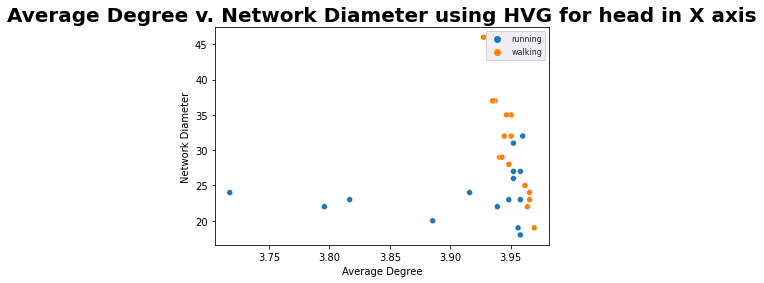

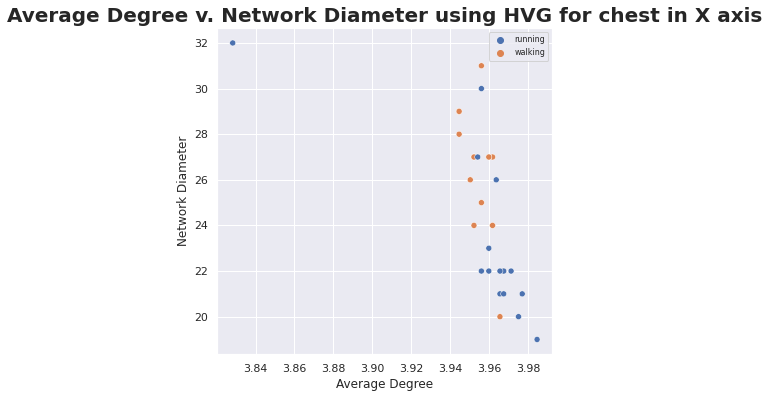

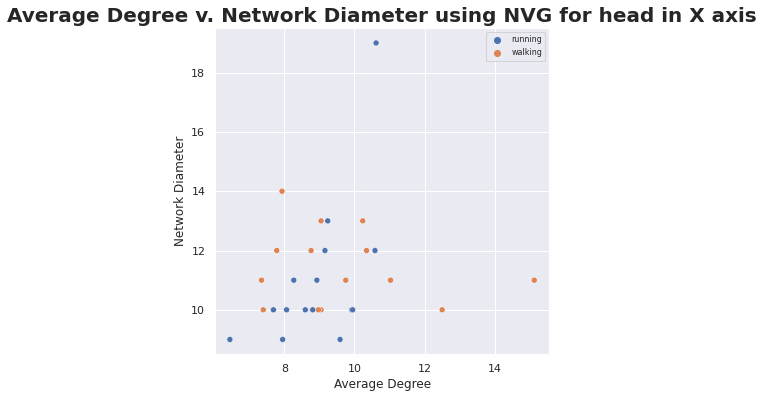

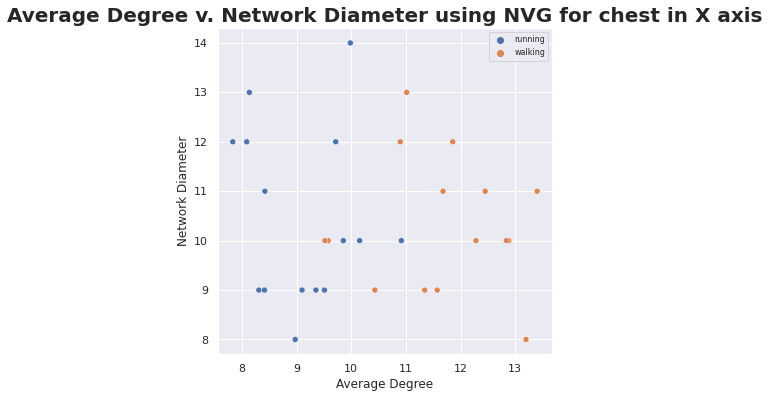

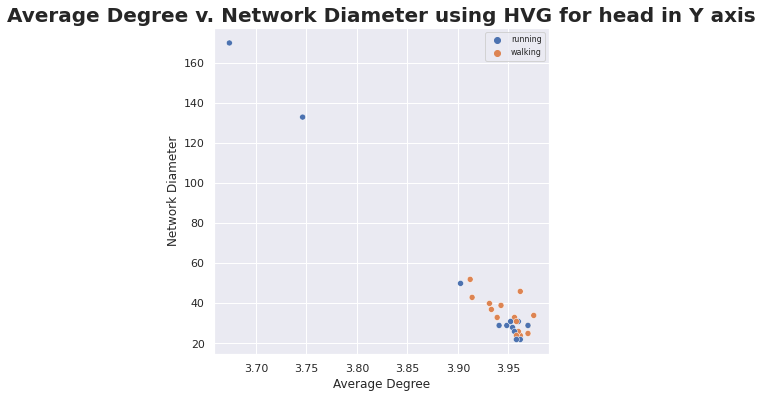

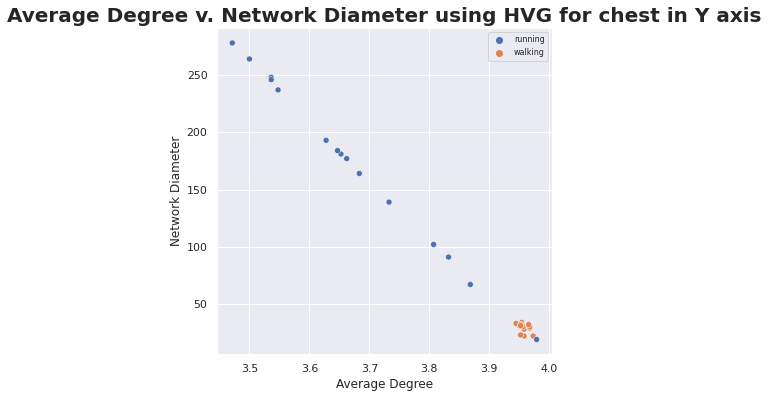

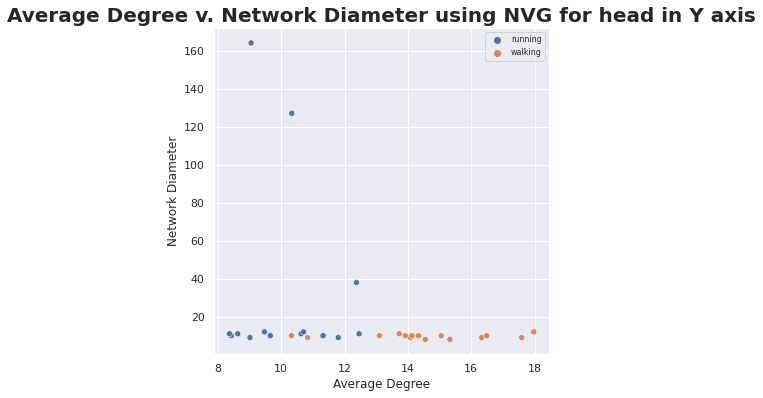

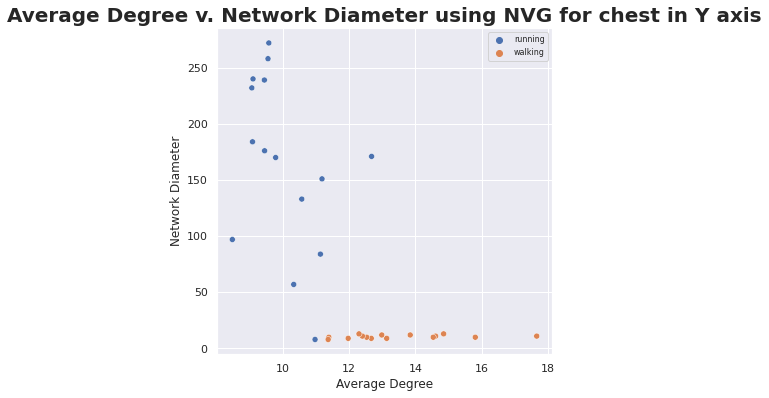

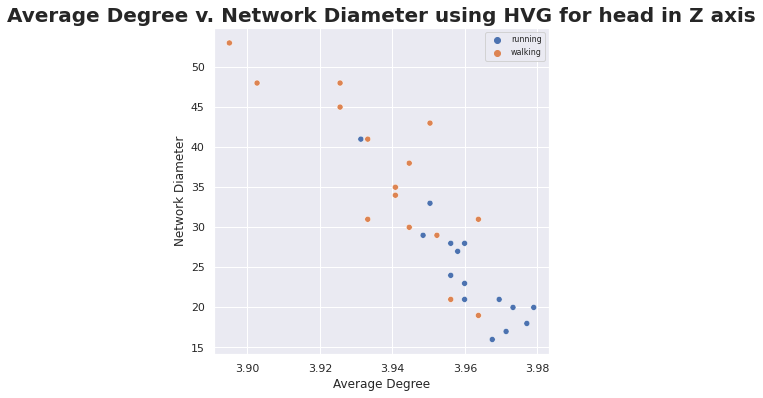

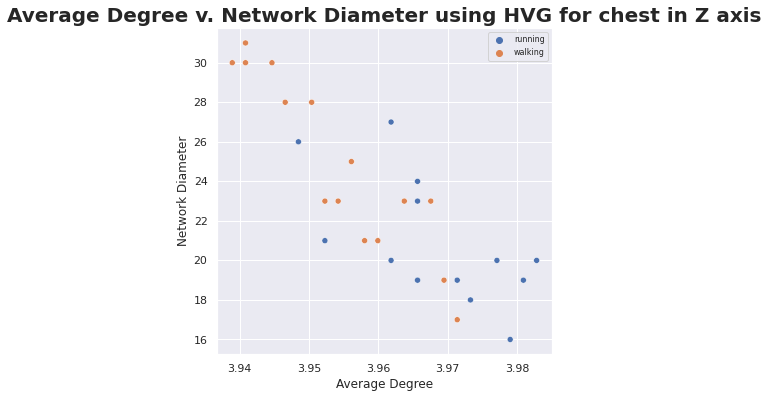

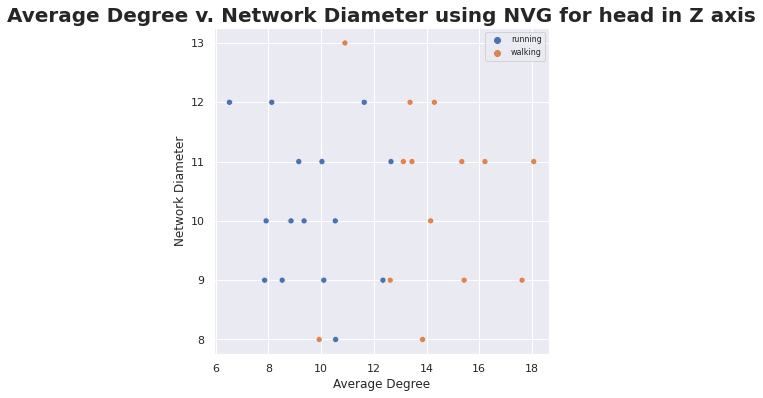

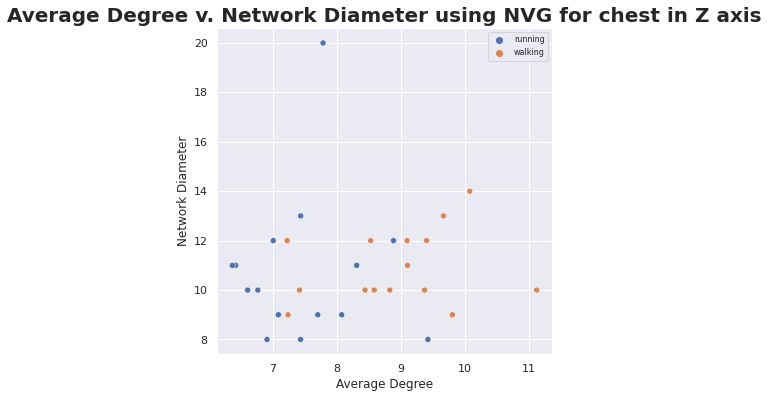

In [ ]:
##### Scatterplot for walking and running #####
axis = ['x','y','z']
method = ['HVG','NVG']
body_part = ['head','chest']

for i in axis:
  for j in method:
    for k in body_part:
      test_frame = creating_df(df,i.upper(),j,k)
      plt.title(f'Average Degree v. Network Diameter using {j} for {k} in {i.upper()} axis',fontweight="bold",fontsize=20)
      ploting_run_walk(test_frame)

6. Generate  scatter plots: average degree vs network diameter and color the points according to climbing up and climbing down (do this for each accelerometer signal and each method (HVH and NVG))

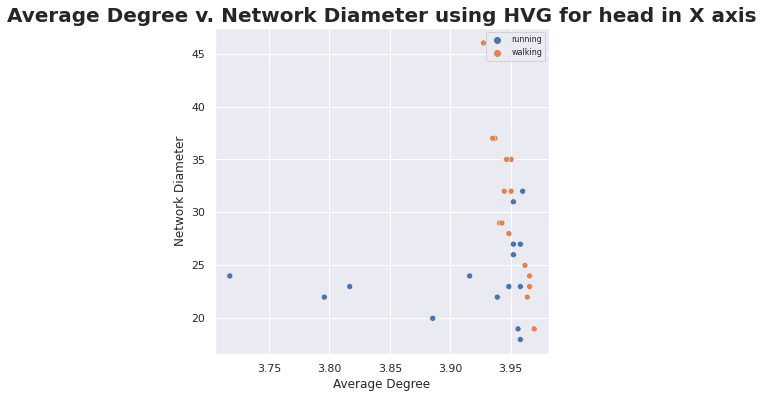

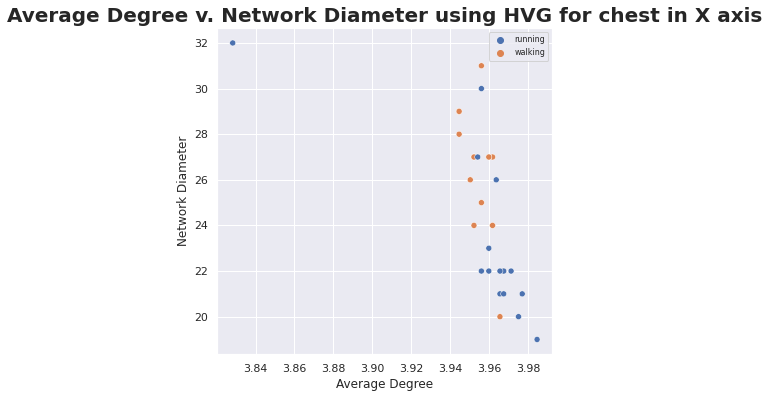

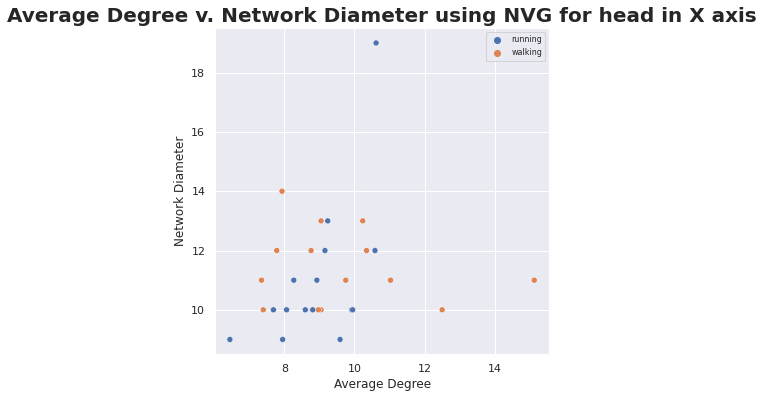

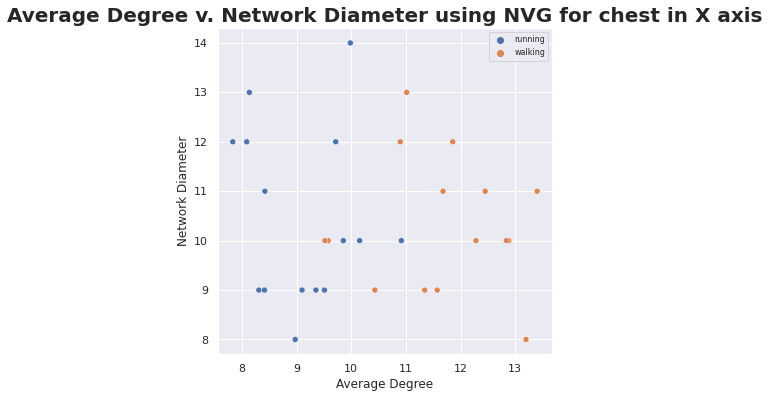

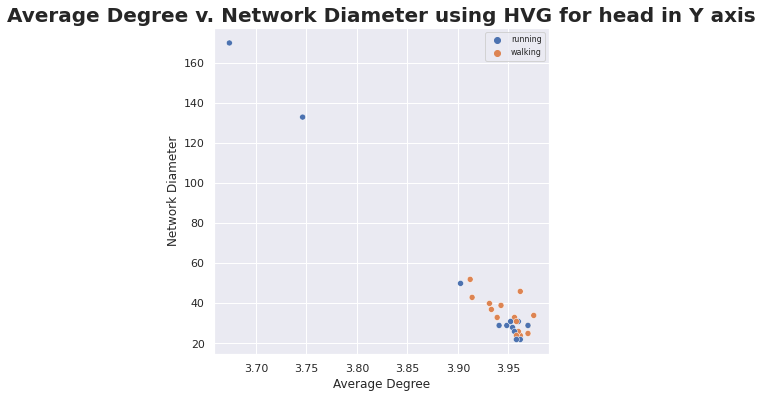

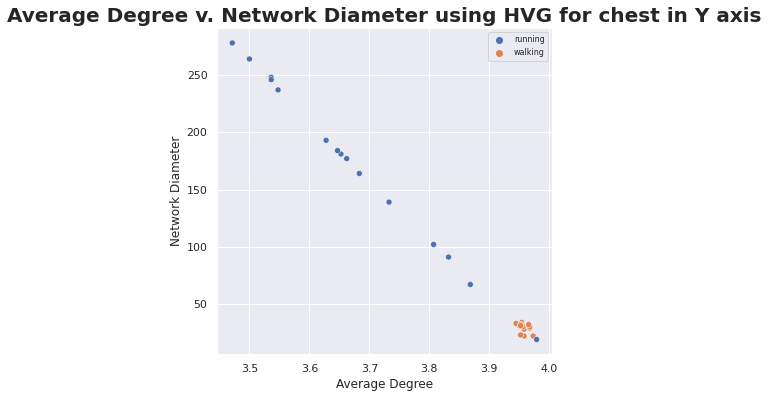

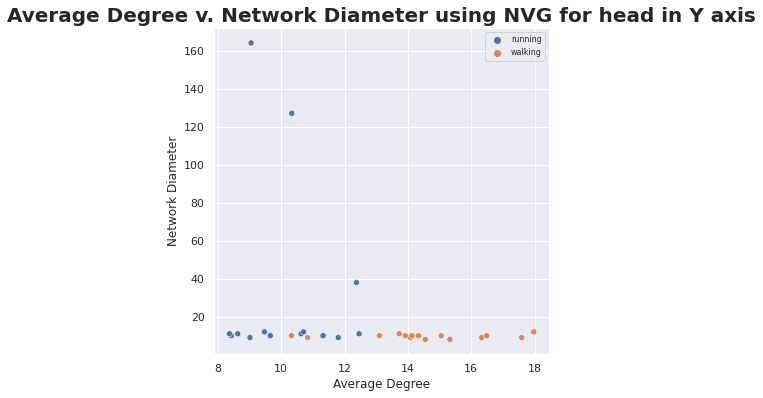

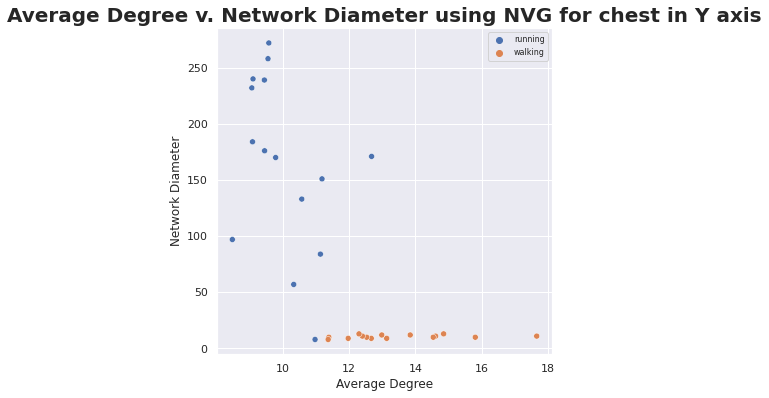

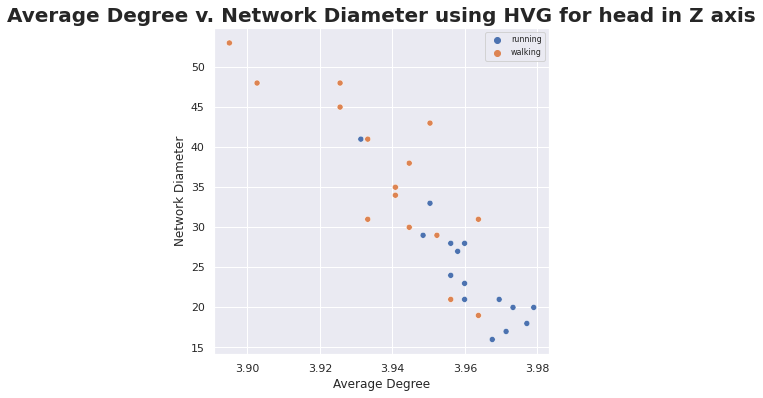

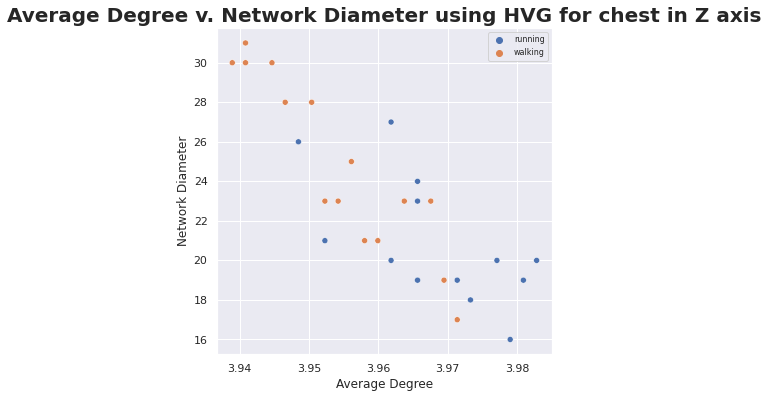

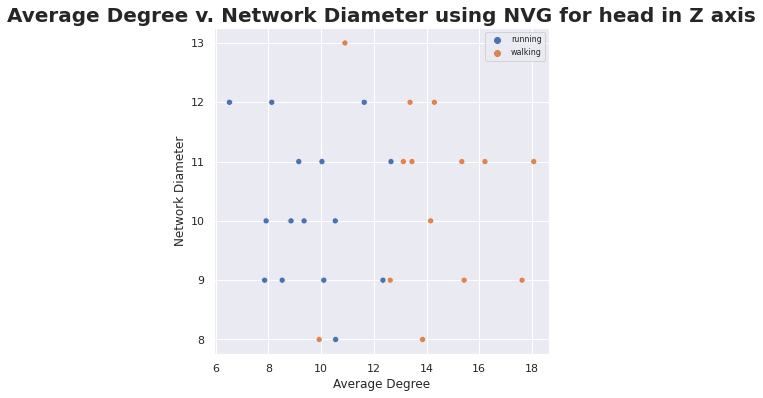

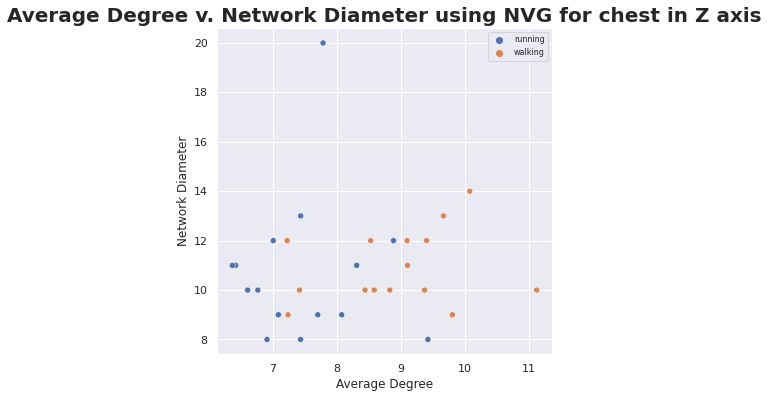

In [ ]:
##### Scatterplot for walking and running #####
axis = ['x','y','z']
method = ['HVG','NVG']
body_part = ['head','chest']

for i in axis:
  for j in method:
    for k in body_part:
      test_frame = creating_df(df,i.upper(),j,k)
      plt.title(f'Average Degree v. Network Diameter using {j} for {k} in {i.upper()} axis',fontweight="bold",fontsize=20)
      ploting_run_walk(test_frame)

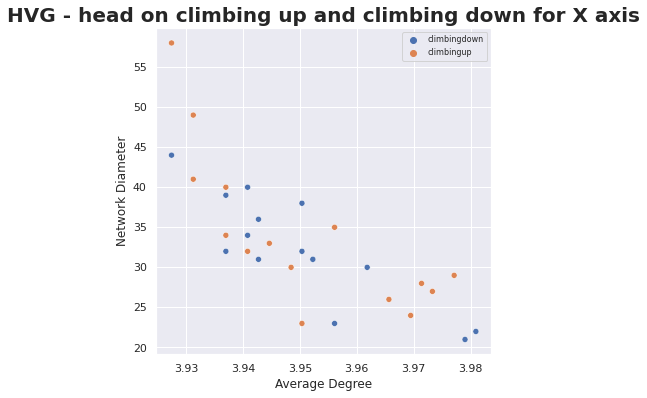

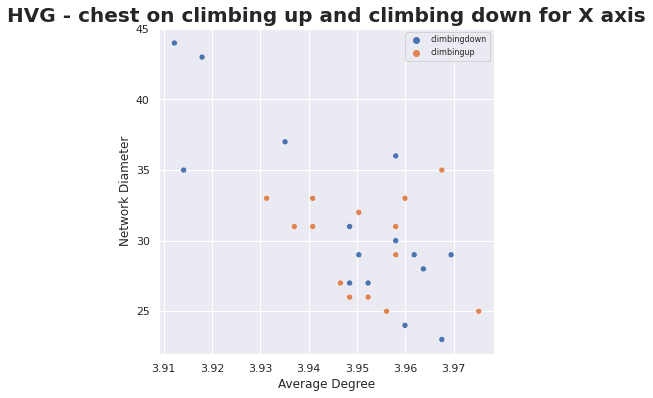

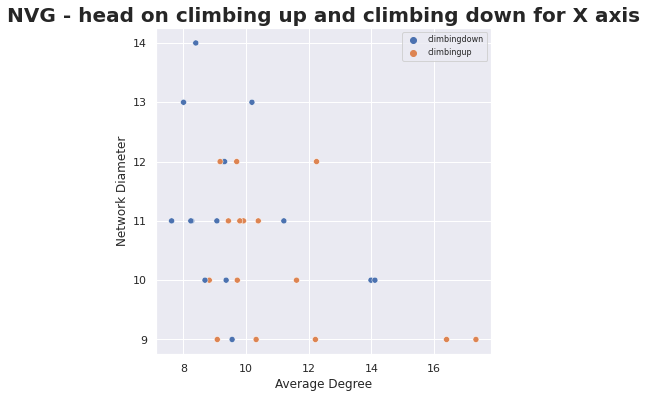

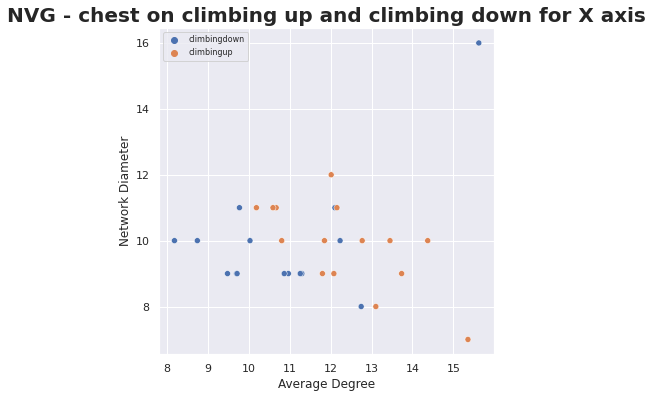

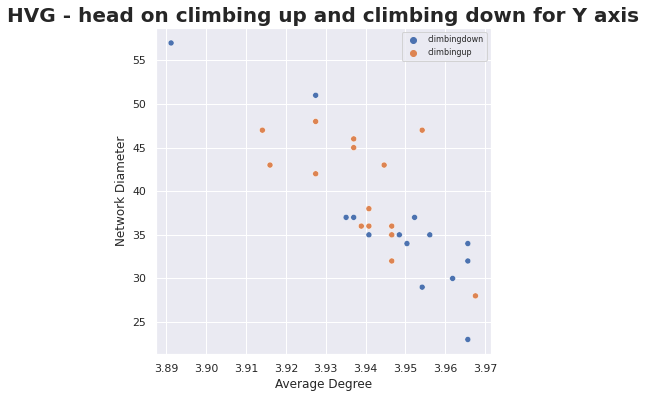

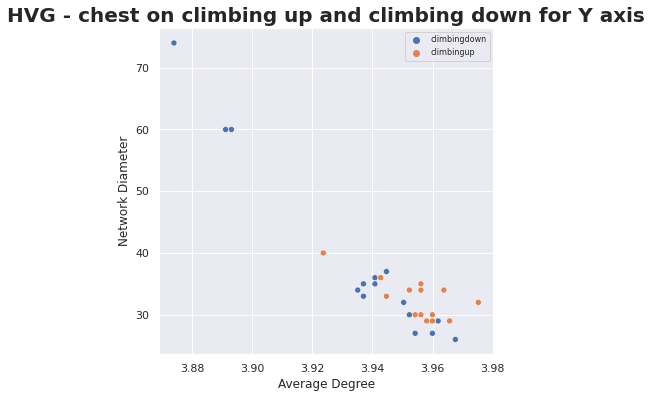

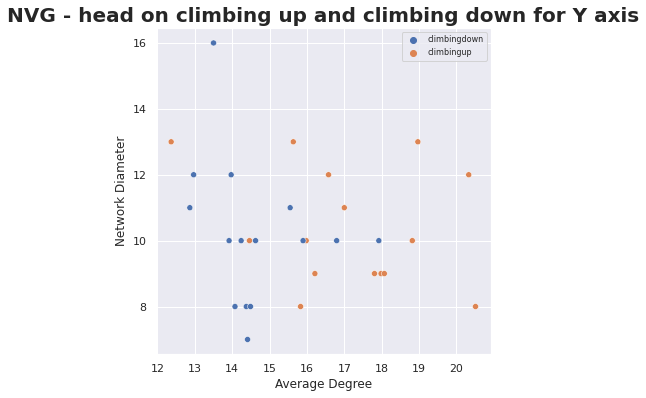

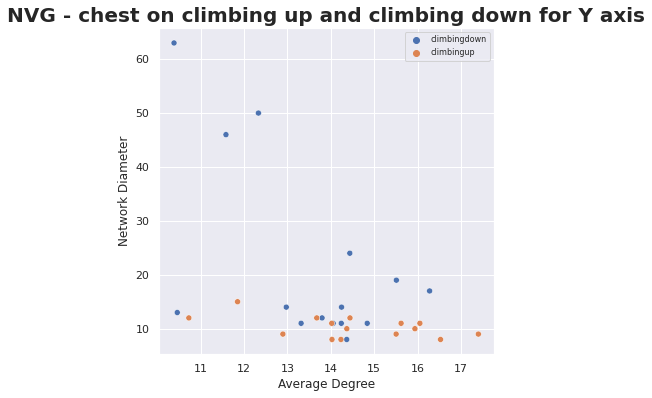

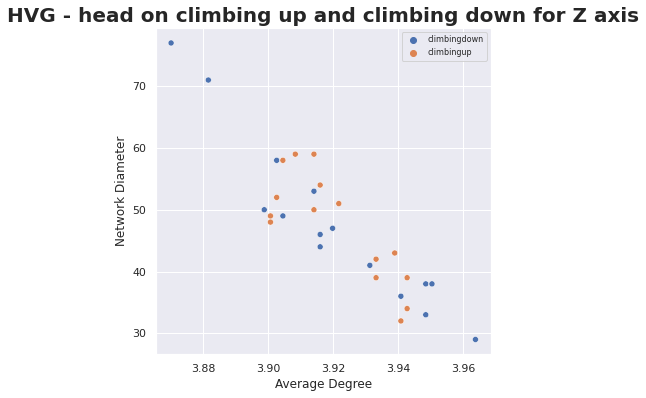

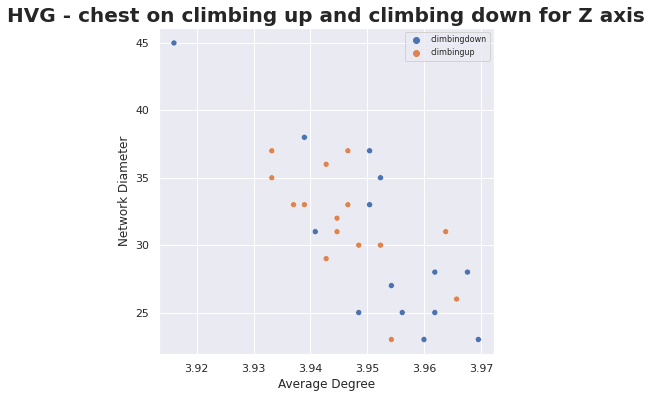

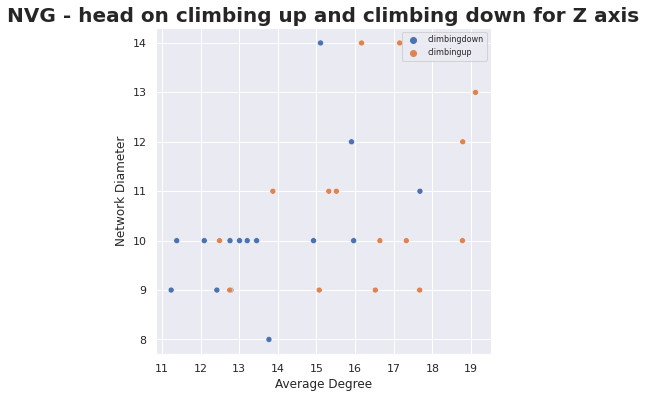

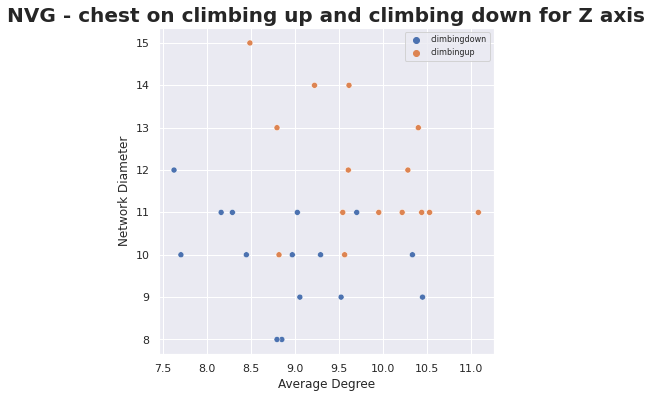

In [ ]:
##### Scatterplot for climbing up and down #####
axis = ['x','y','z']
method = ['HVG','NVG']
body_part = ['head','chest']

for i in axis:
  for j in method:
    for k in body_part:
      test_frame = creating_df(df,i.upper(),j,k)
      plt.title(f'{j} - {k} on climbing up and climbing down for {i.upper()} axis',fontweight="bold",fontsize=20)
      ploting_climbing(test_frame)

# Task 2

## Tabulation of results

### Code we were told to use from Github


In [ ]:
##### Code for permutation entropy - From Github from professor #####
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

### Tabulation Code

1. Compute permutation entropy and complexity for the aforementioned data.
Consider the accelerometer data in all three directions
2. Vary the following parameters

embedded dimensions = [3, 4, 5, 6]

embedded delays = [1, 2, 3]

signal length = [1024, 2048, 4096]


In [ ]:
###### Creation of dataframe ######
df_task2 = pd.DataFrame(columns=["Subject", "Accelerometer Axis", "Signal Length","Dimension", "Delay", "Permutation Entropy", "Complexity", "Body Part", "Activity"])

actv = ['climbingup','climbingdown','running','walking']
bdy_pt = ['head','chest']

axis = list("xyz")
signals = [1024,2048,4096]
dimensions = [3, 4, 5, 6]
delays = [1,2,3]

for activity in actv:
  for sub_name in range(0,15):
    for body in bdy_pt:
      test = ('/acc_' + activity + '_csv' + f' ({sub_name})')
      read_me = pd.read_csv(directory_path + test + '/acc_' + activity + f'_{body}' + '.csv')
      for i in axis:
        for j in signals:
          for k in dimensions:
            for l in delays:
              op = ordinal_patterns(read_me['attr_'+i][1000:j], k, l)
              res = [int(sub_name)+1, i.upper(), j, k, l, p_entropy(op), complexity(op), body, activity]
              d = dict(zip(["Subject", "Accelerometer Axis", "Signal Length","Dimension", "Delay", "Permutation Entropy", "Complexity", "Body Part", "Activity"], res))
              df_task2 = df_task2.append(d, ignore_index=True)

In [ ]:
df_task2

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Body Part,Activity
0,1,X,1024,3,1,0.848680,0.128202,head,climbingup
1,1,X,1024,3,2,0.877461,0.105074,head,climbingup
2,1,X,1024,3,3,0.860593,0.112465,head,climbingup
3,1,X,1024,4,1,0.924833,0.072975,head,climbingup
4,1,X,1024,4,2,0.890299,0.093269,head,climbingup
...,...,...,...,...,...,...,...,...,...
12955,15,Z,4096,5,2,0.856516,0.207638,chest,walking
12956,15,Z,4096,5,3,0.897235,0.167600,chest,walking
12957,15,Z,4096,6,1,0.779405,0.275825,chest,walking
12958,15,Z,4096,6,2,0.884392,0.200662,chest,walking


In [ ]:
df_task2.head(10)

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Body Part,Activity
0,1,X,1024,3,1,0.848680,0.128202,head,climbingup
1,1,X,1024,3,2,0.877461,0.105074,head,climbingup
2,1,X,1024,3,3,0.860593,0.112465,head,climbingup
3,1,X,1024,4,1,0.924833,0.072975,head,climbingup
4,1,X,1024,4,2,0.890299,0.093269,head,climbingup
5,1,X,1024,4,3,0.934515,0.060242,head,climbingup
6,1,X,1024,5,1,0.941559,0.058762,head,climbingup
7,1,X,1024,5,2,0.938053,0.058665,head,climbingup
8,1,X,1024,5,3,0.973976,0.025299,head,climbingup
9,1,X,1024,6,1,0.973102,0.027774,head,climbingup


In [ ]:
df_task2.tail(10)

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Body Part,Activity
12950,15,Z,4096,3,3,0.967178,0.030579,chest,walking
12951,15,Z,4096,4,1,0.758832,0.217676,chest,walking
12952,15,Z,4096,4,2,0.878014,0.139872,chest,walking
12953,15,Z,4096,4,3,0.937301,0.079317,chest,walking
12954,15,Z,4096,5,1,0.739604,0.275078,chest,walking
12955,15,Z,4096,5,2,0.856516,0.207638,chest,walking
12956,15,Z,4096,5,3,0.897235,0.167600,chest,walking
12957,15,Z,4096,6,1,0.779405,0.275825,chest,walking
12958,15,Z,4096,6,2,0.884392,0.200662,chest,walking
12959,15,Z,4096,6,3,0.913001,0.168014,chest,walking


## Scatterplots

In [ ]:
# Definitions
def creating_df(dataframe,axis,body_part,dim):
  df_ax = dataframe[dataframe['Accelerometer Axis'] == axis]
  df_bdy_pt = df_ax[df_ax['Body Part'] == body_part]
  df_dim = df_bdy_pt[df_bdy_pt['Dimension'] == dim]
  return(df_dim)

def ploting_task2(dataframe):
  sns.scatterplot(data = dataframe, x ="Permutation Entropy", y ="Complexity", hue ="Activity")
  sns.set(rc={'figure.figsize':(6,6)})
  plt.legend(fontsize = 8)
  plt.show()


3. Generate scatter plots:  permutation entropy vs complexity and color the points according to walking and running (for signal length =4096, embedded delay = 1, and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions)

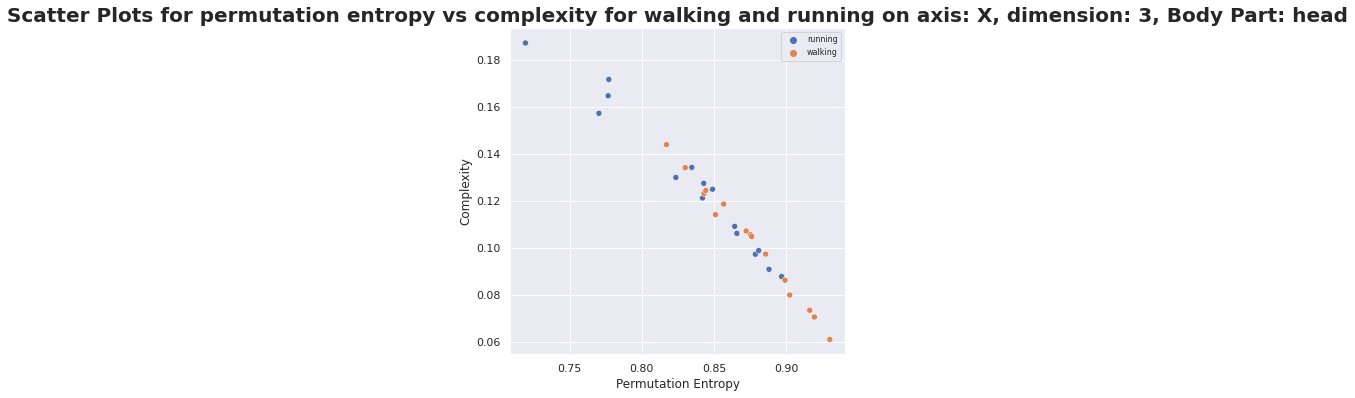

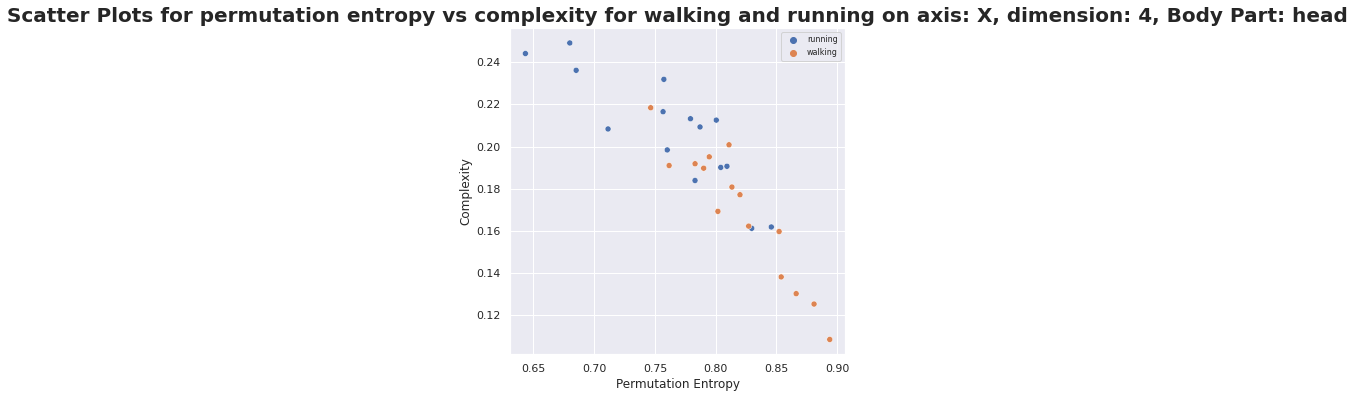

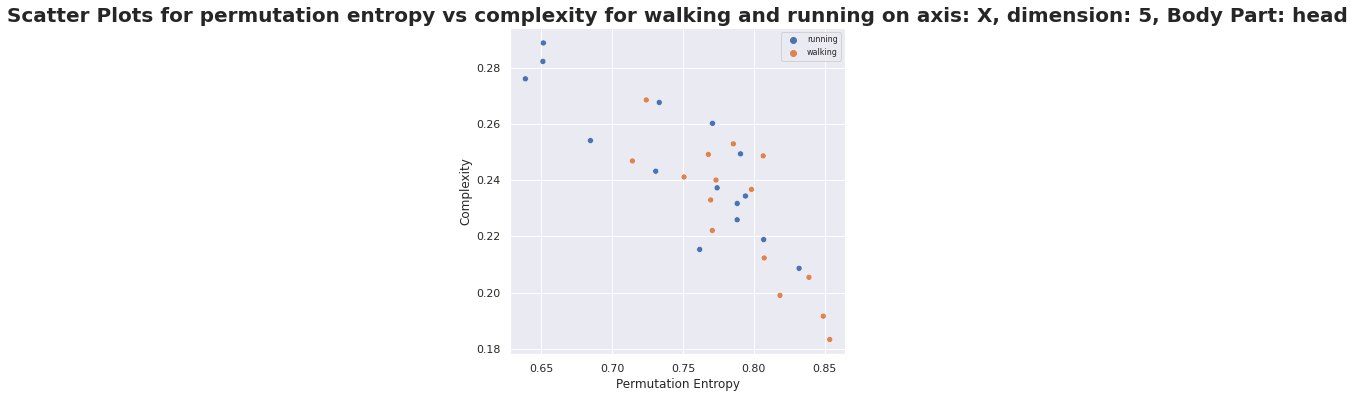

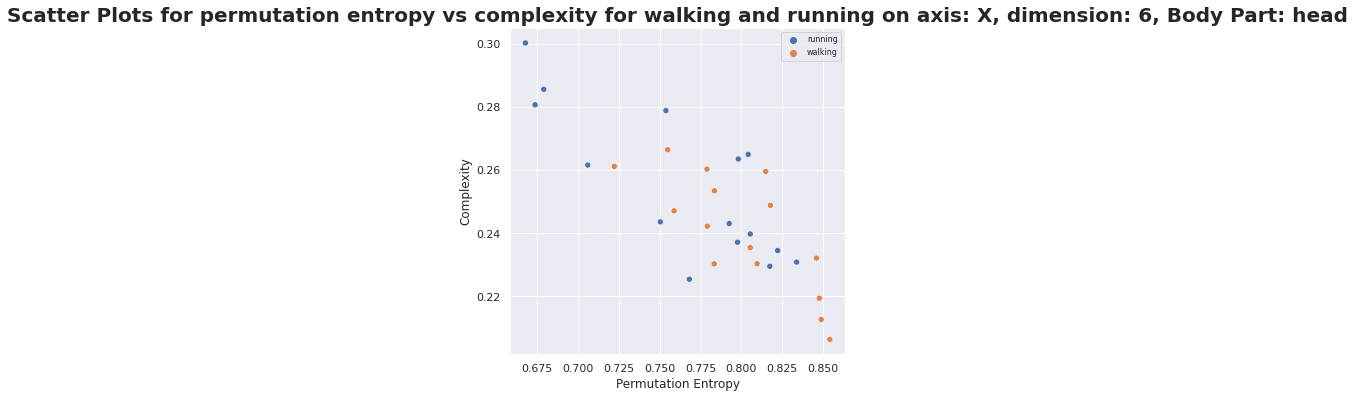

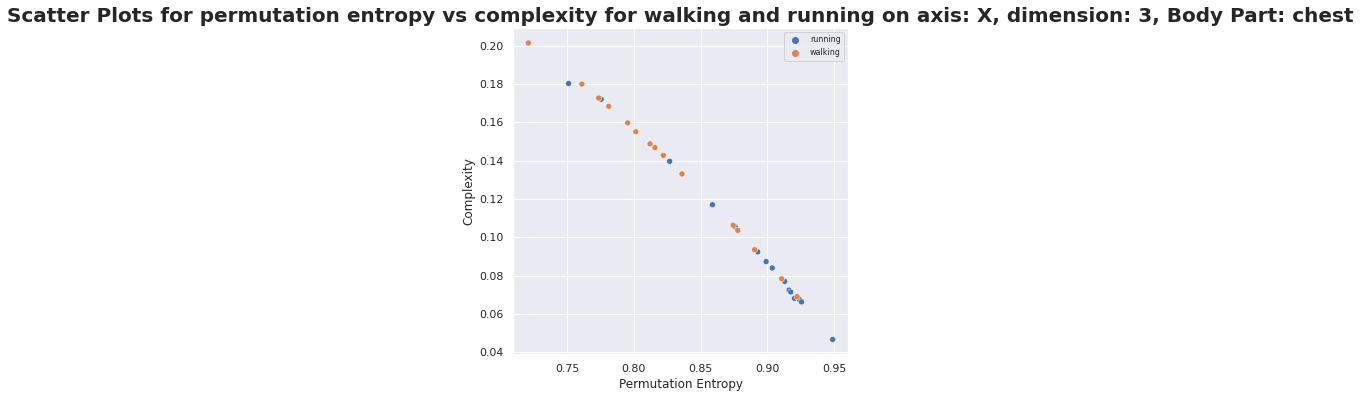

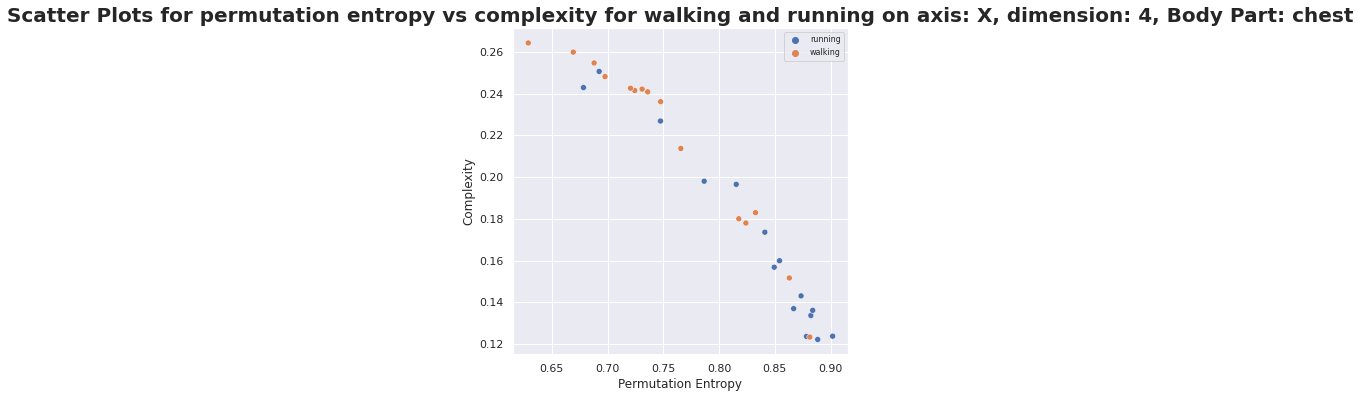

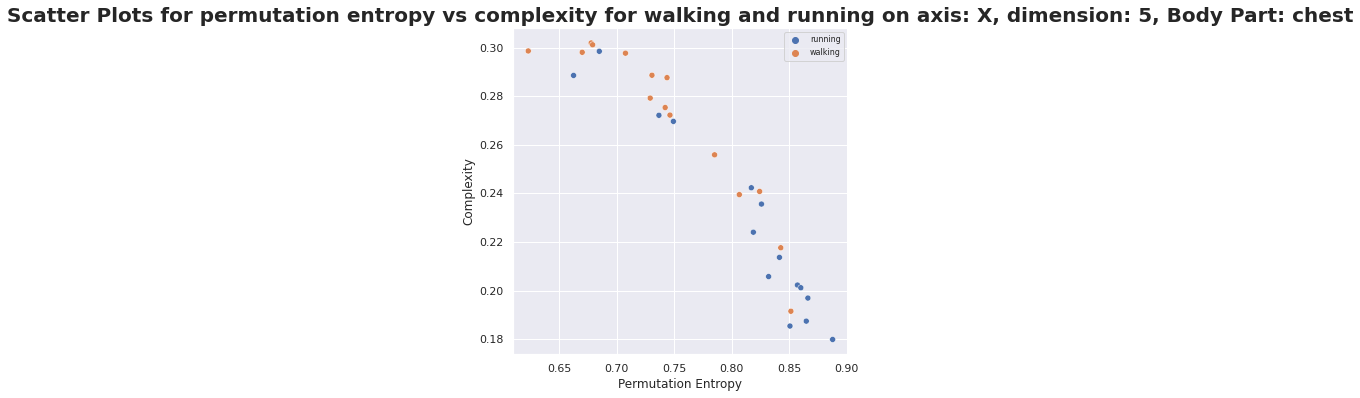

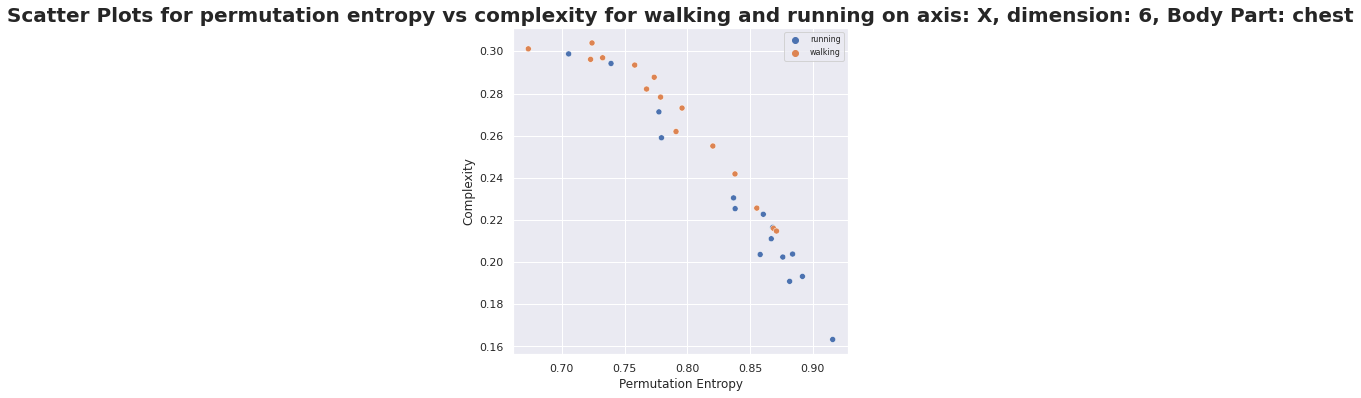

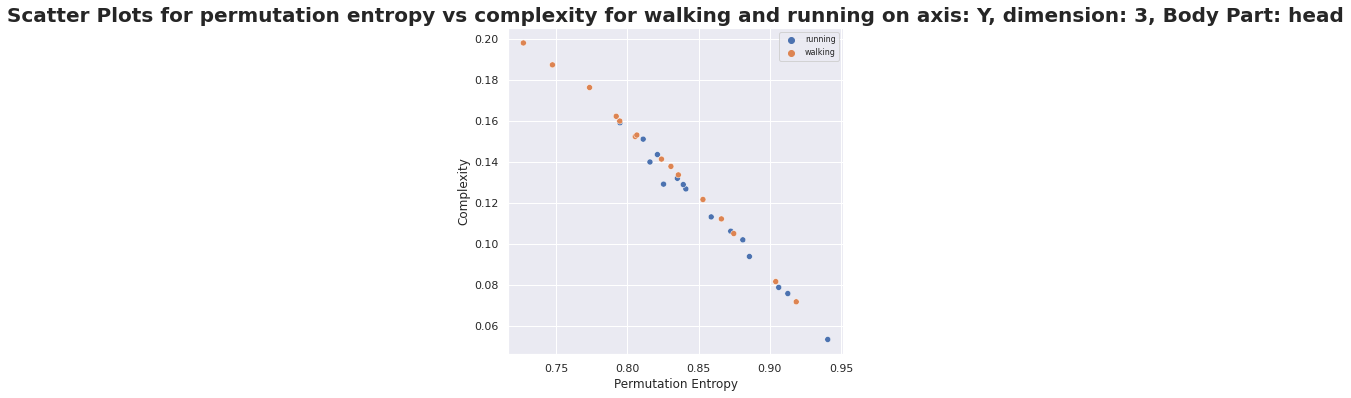

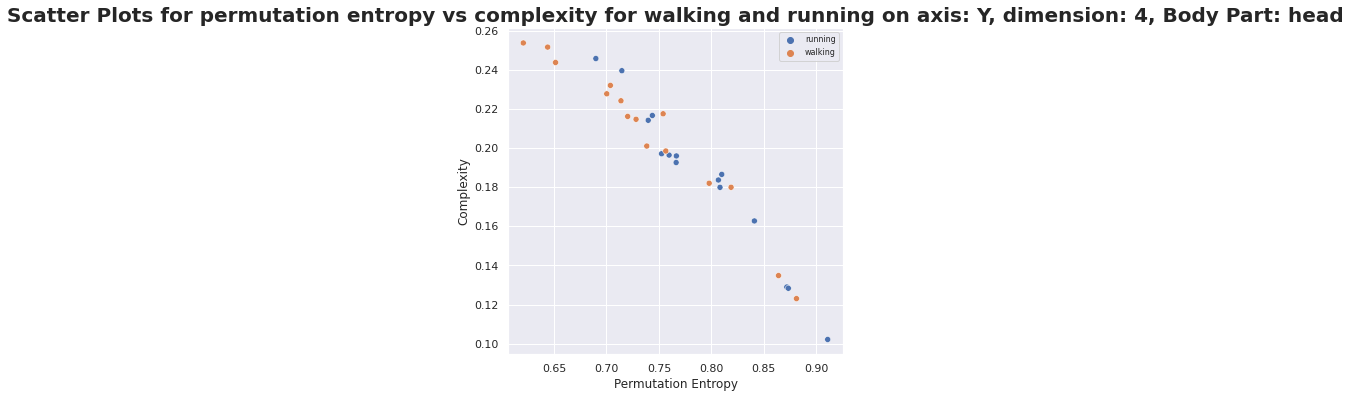

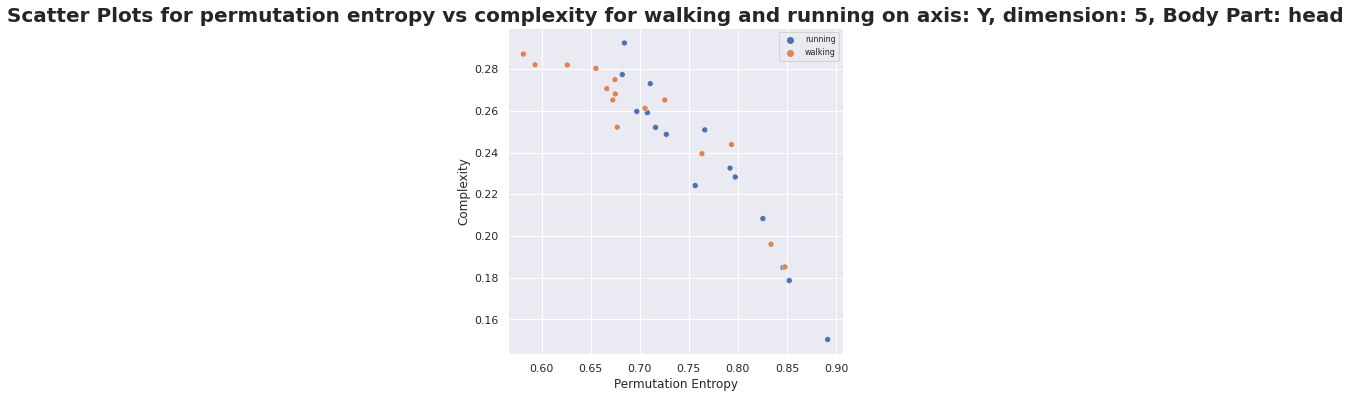

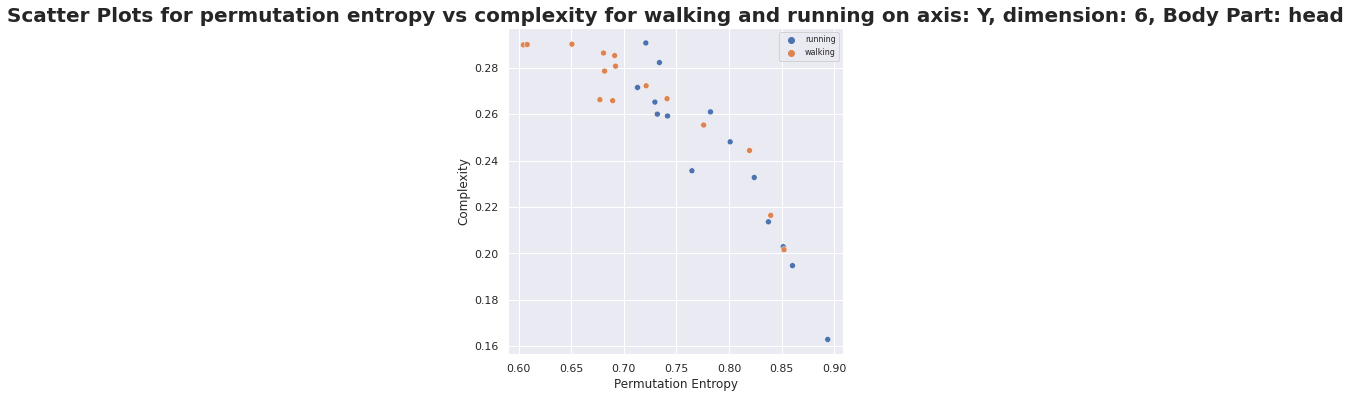

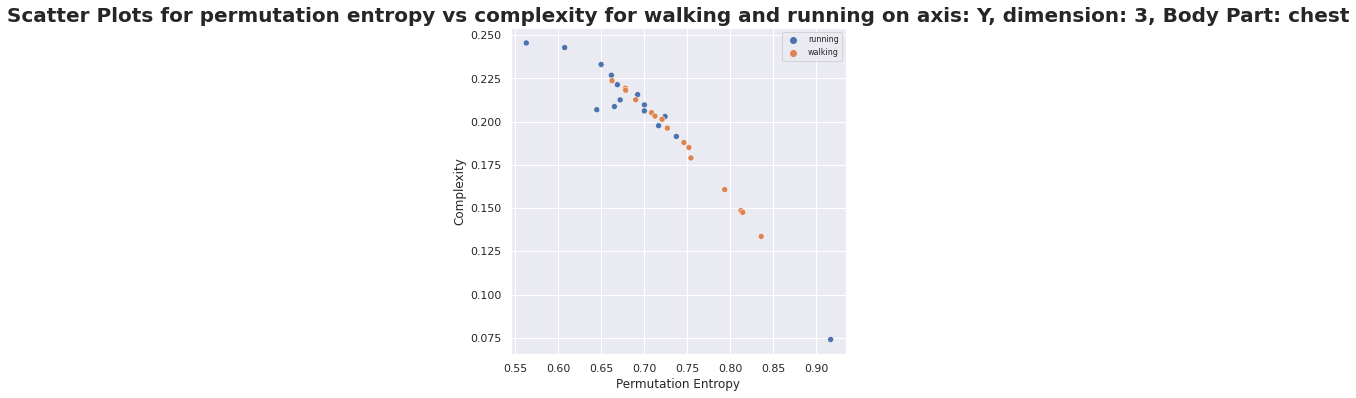

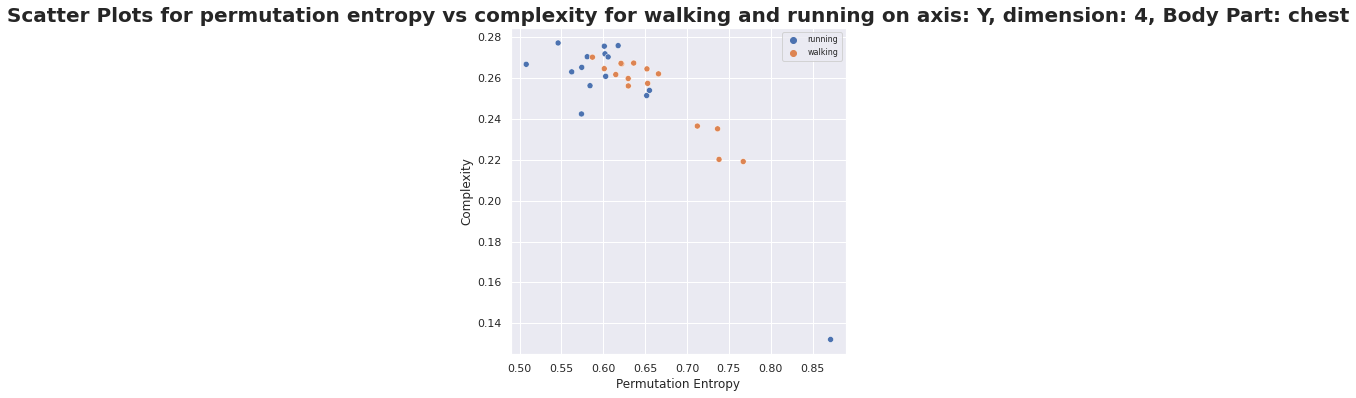

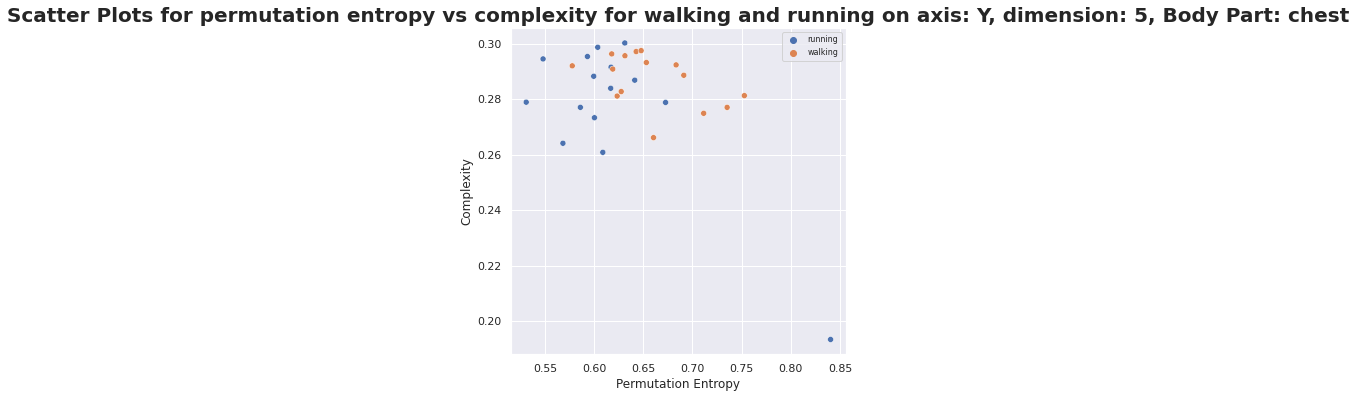

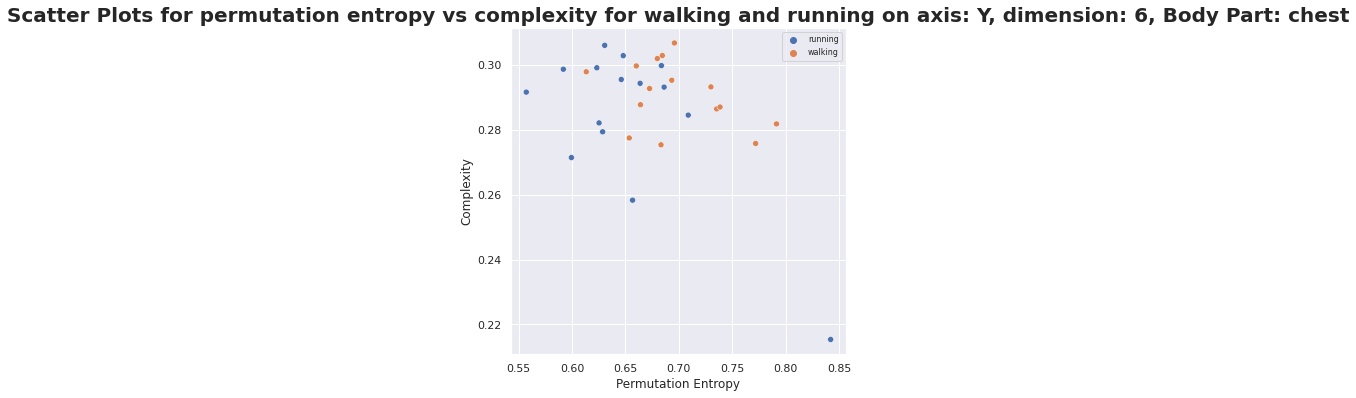

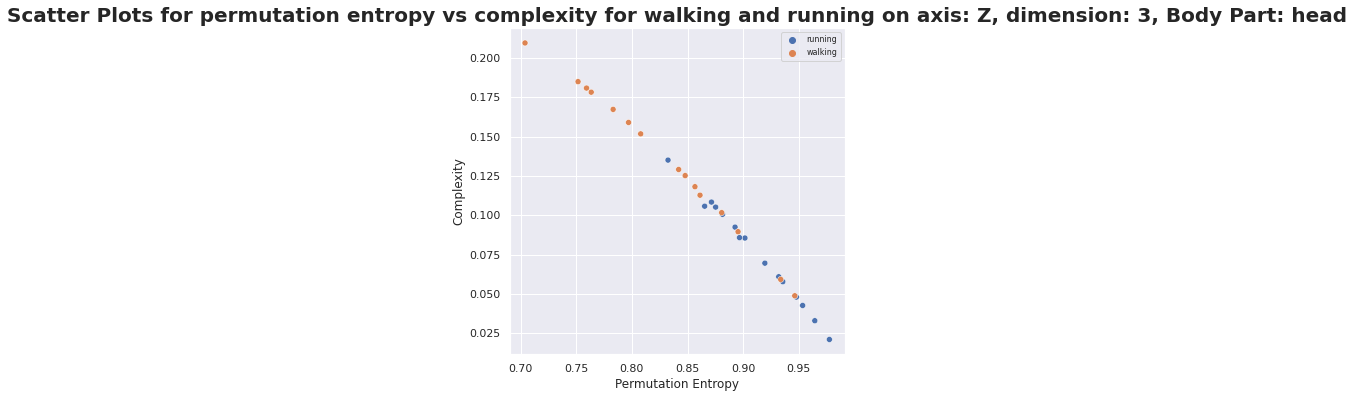

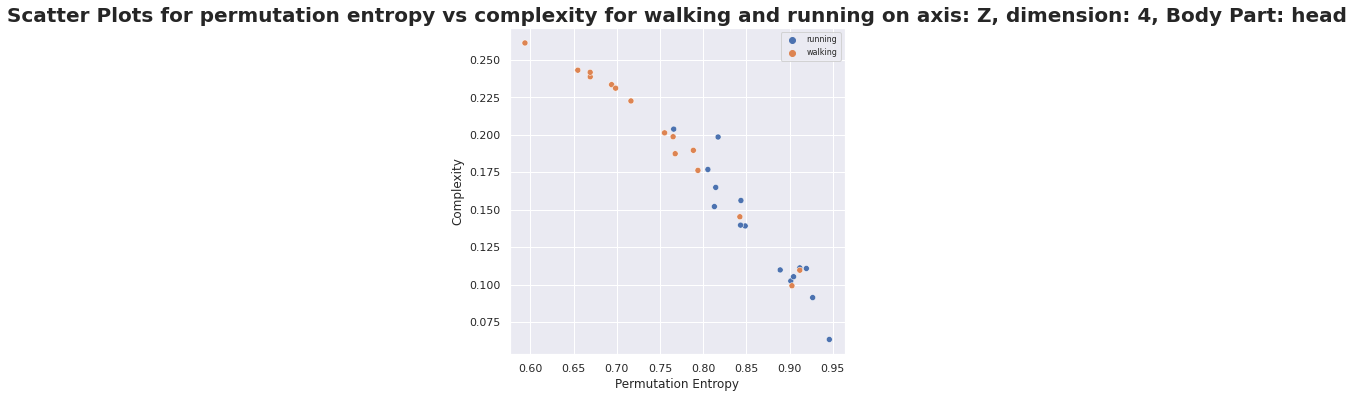

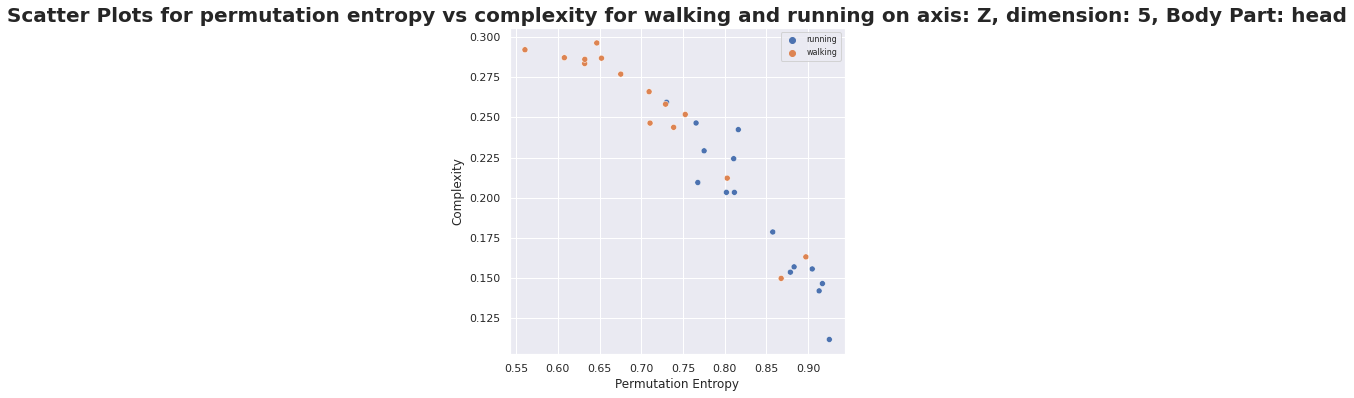

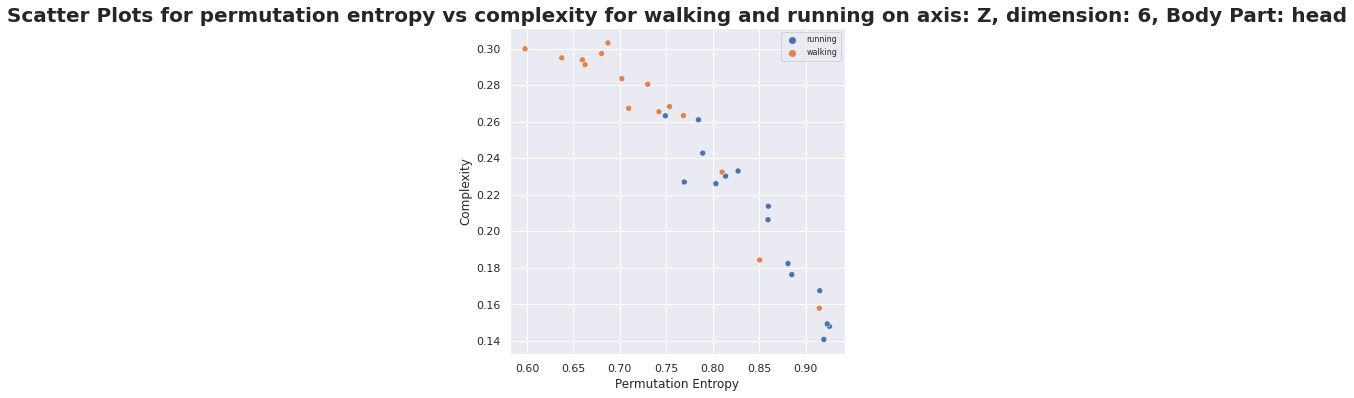

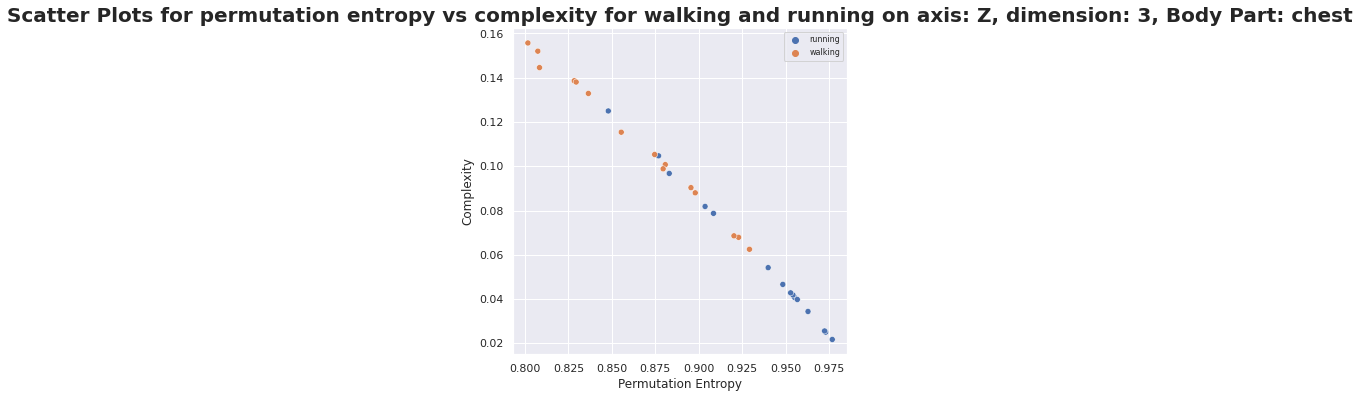

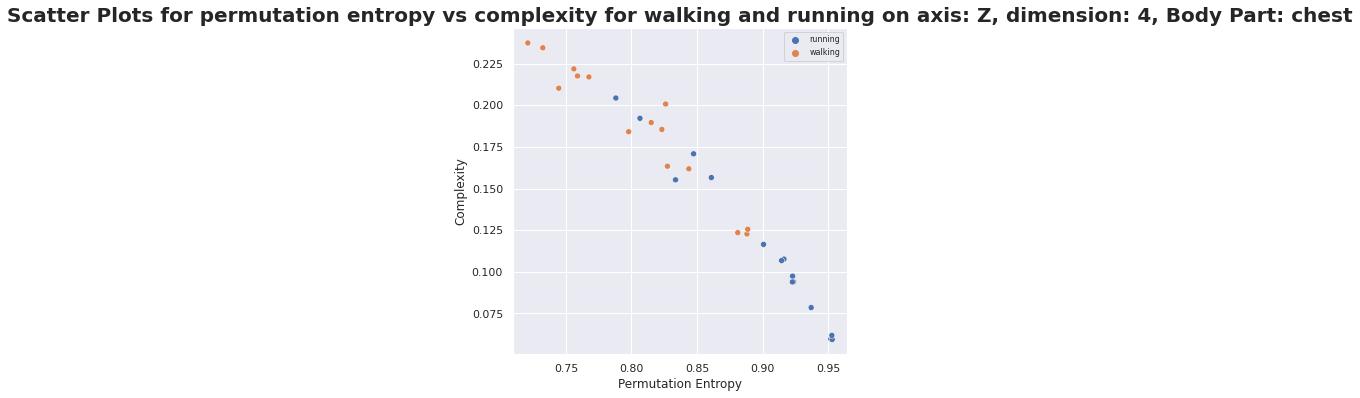

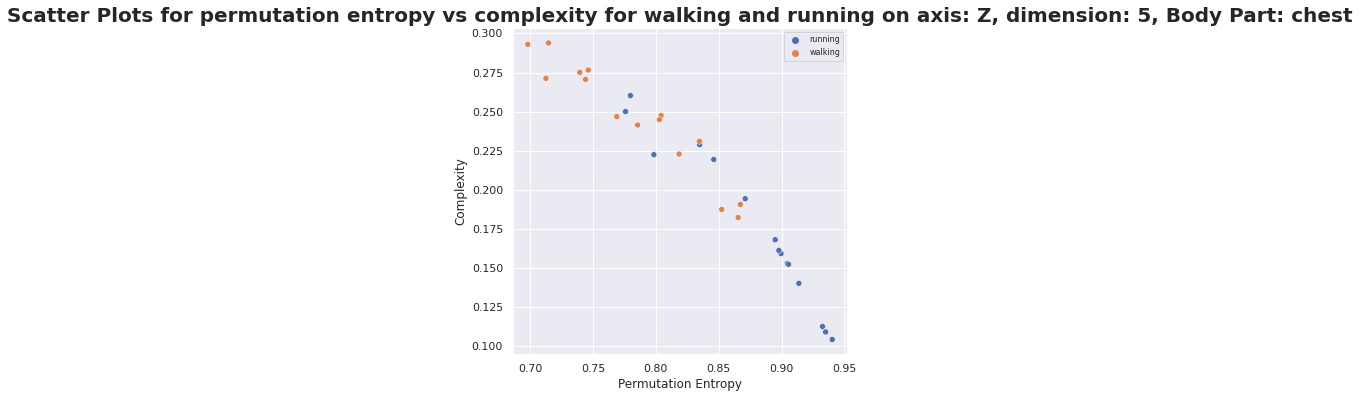

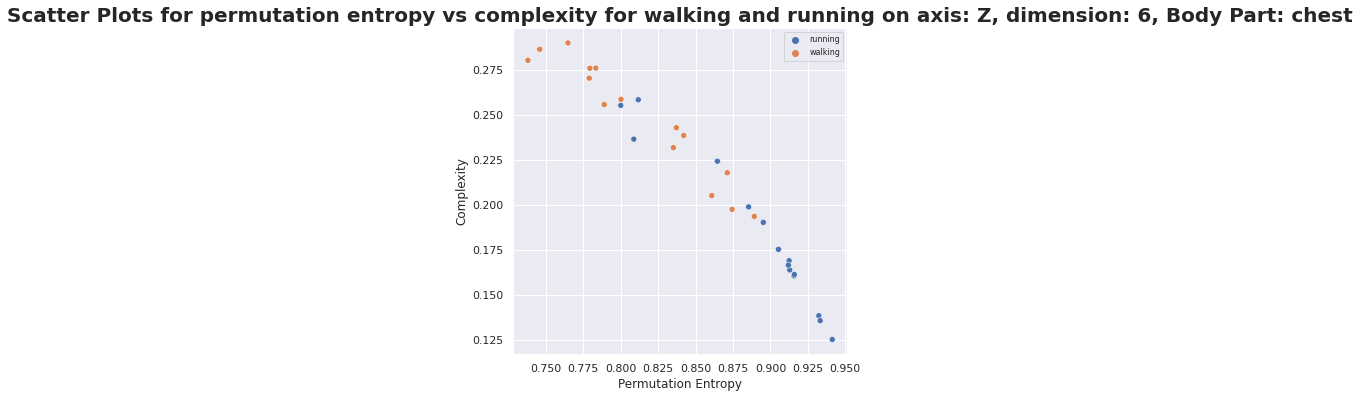

In [ ]:
##### Scatterplot for walking and running #####

data_simple = df_task2[((df_task2['Activity'] == 'running') | (df_task2['Activity'] == 'walking')) & (df_task2['Signal Length'] == 4096) & (df_task2['Delay'] == 1)]

axis = ['x','y','z']
body_part = ['head','chest']
dim = [3,4,5,6]

for i in axis:
  full_ax = i.upper()
  for j in body_part:
    for k in dim: 
      test_frame = creating_df(data_simple,full_ax,j,k)
      plt.title(f'Scatter Plots for permutation entropy vs complexity for walking and running on axis: {full_ax}, dimension: {k}, Body Part: {j}',fontweight="bold",fontsize=20)
      ploting_task2(test_frame)

4. Generate scatter plots: permutation entropy vs complexity and color the points according to climbing up and climbing down (for signal length =4096, embedded delay = 1, and embedded dimension = 3, 4, 5, 6, all three accelerometer
directions)


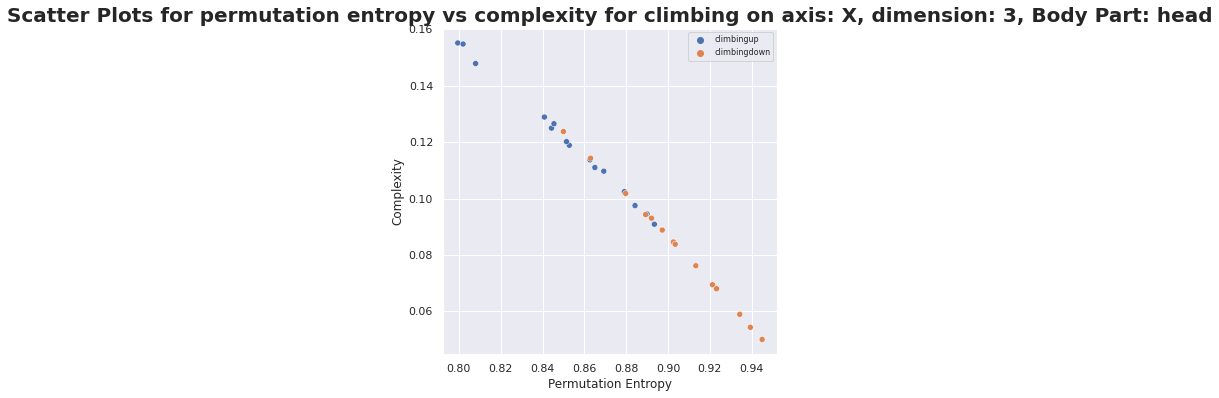

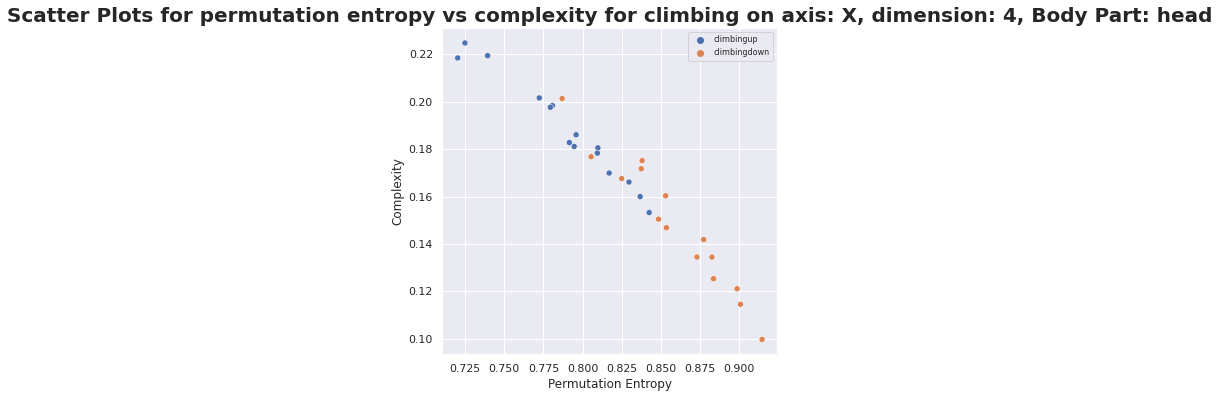

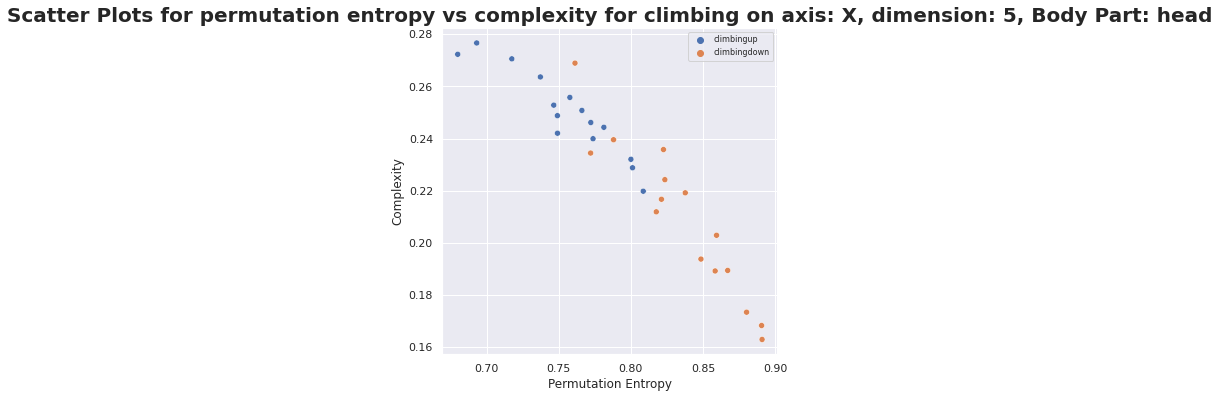

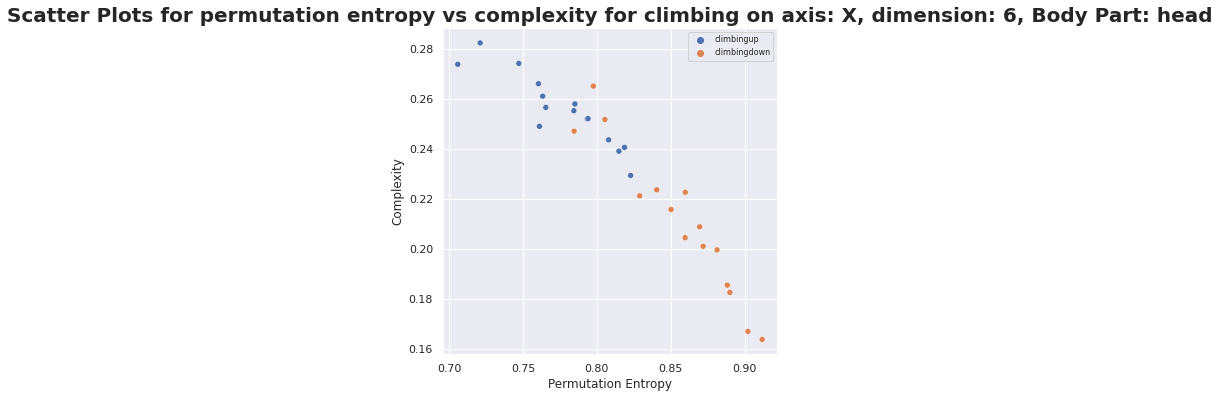

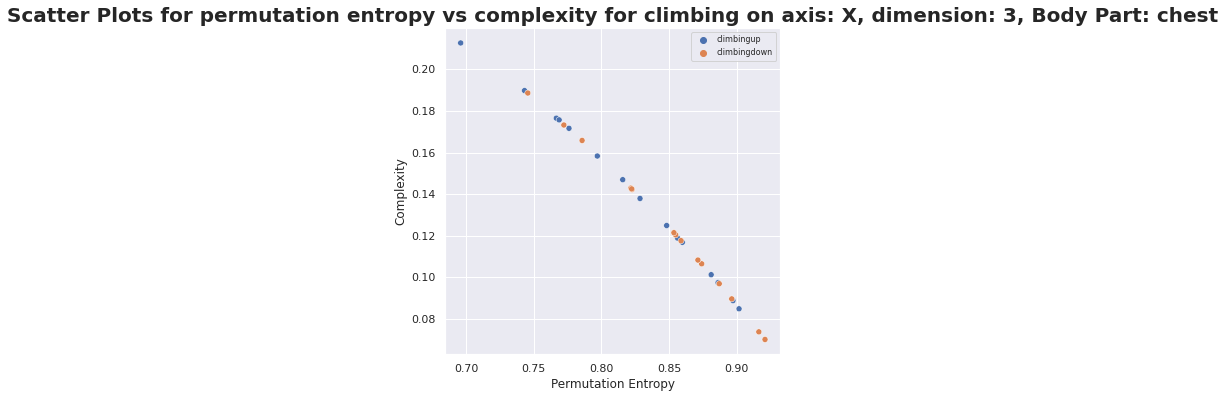

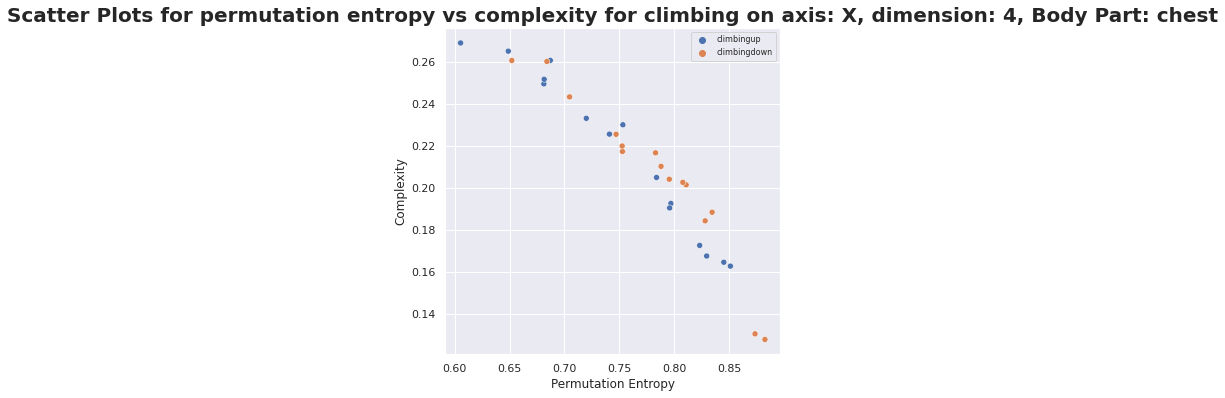

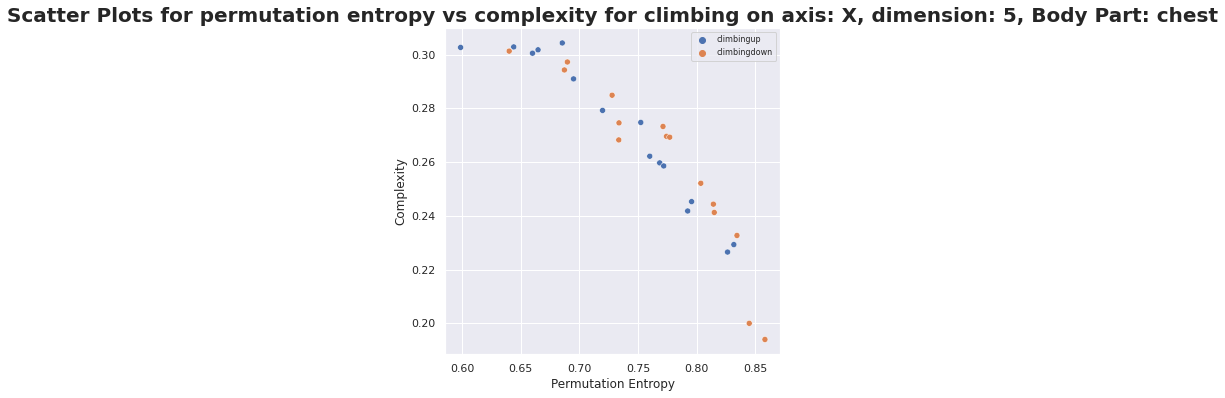

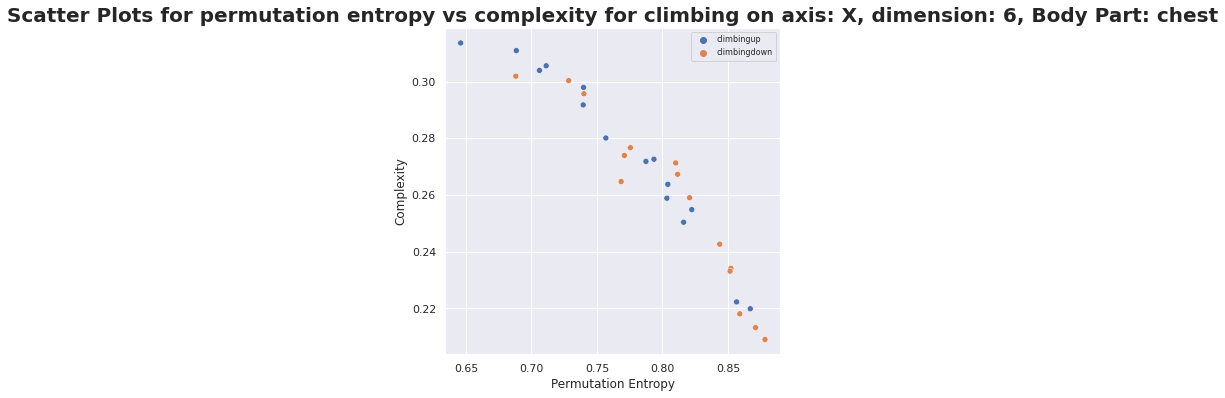

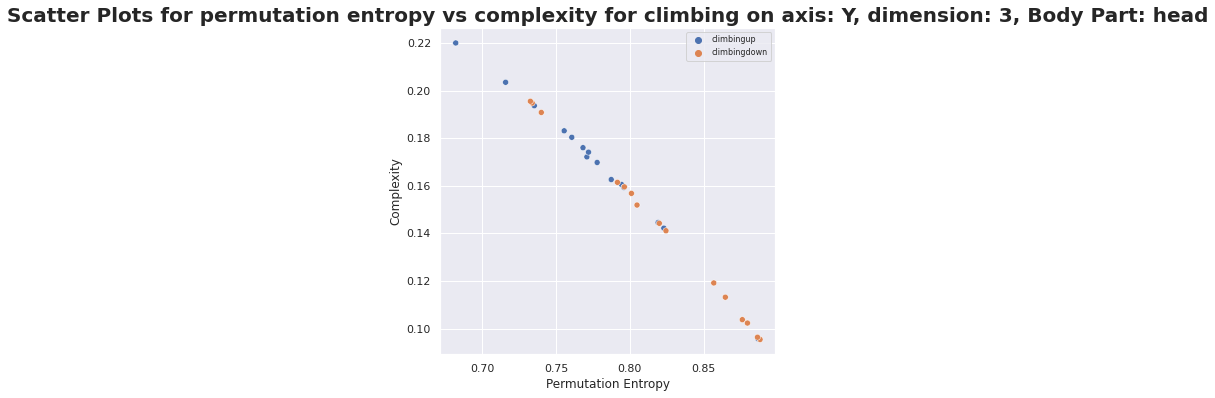

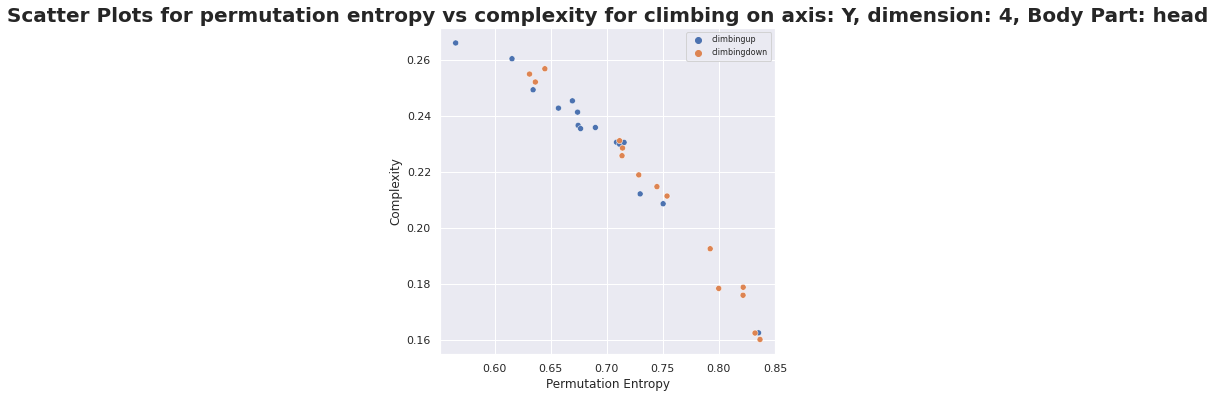

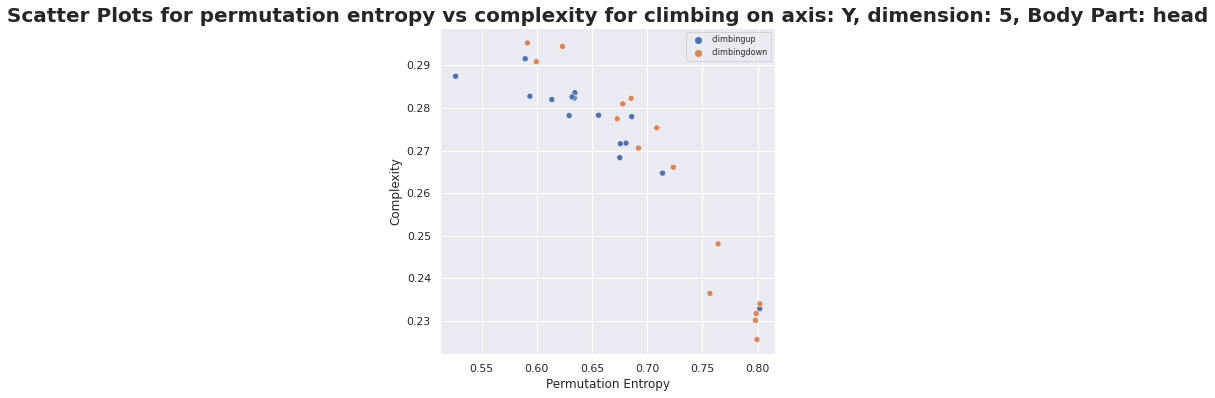

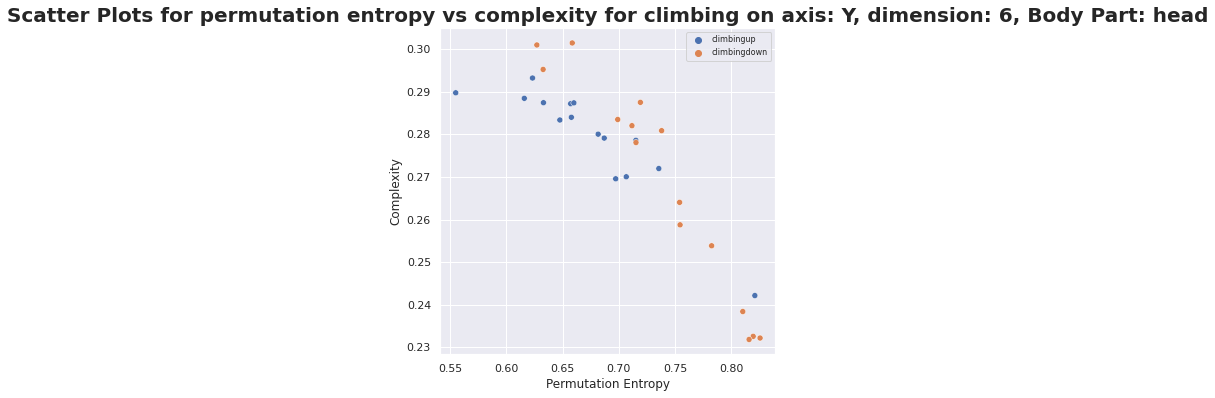

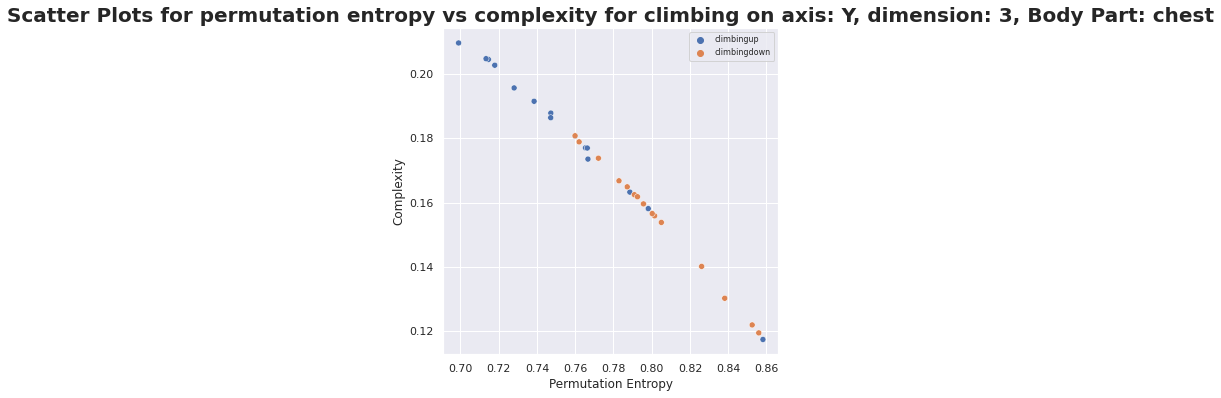

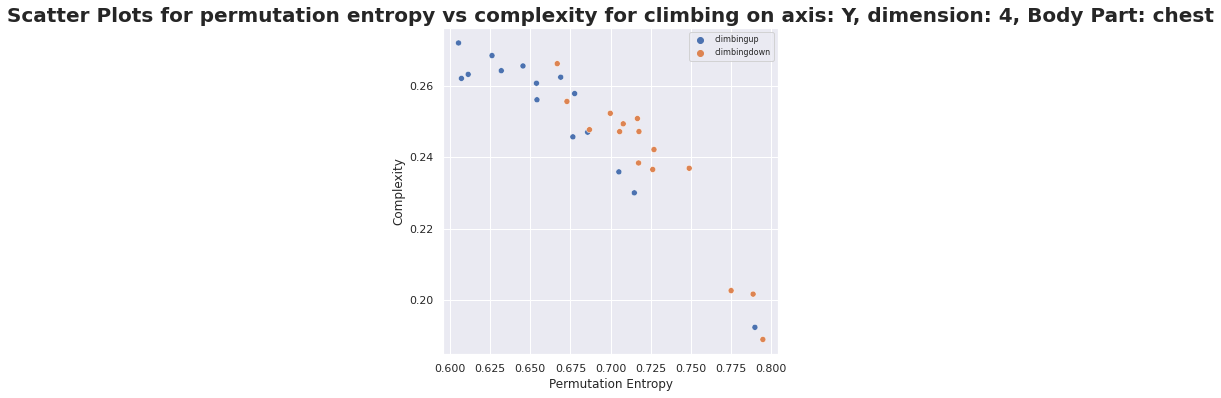

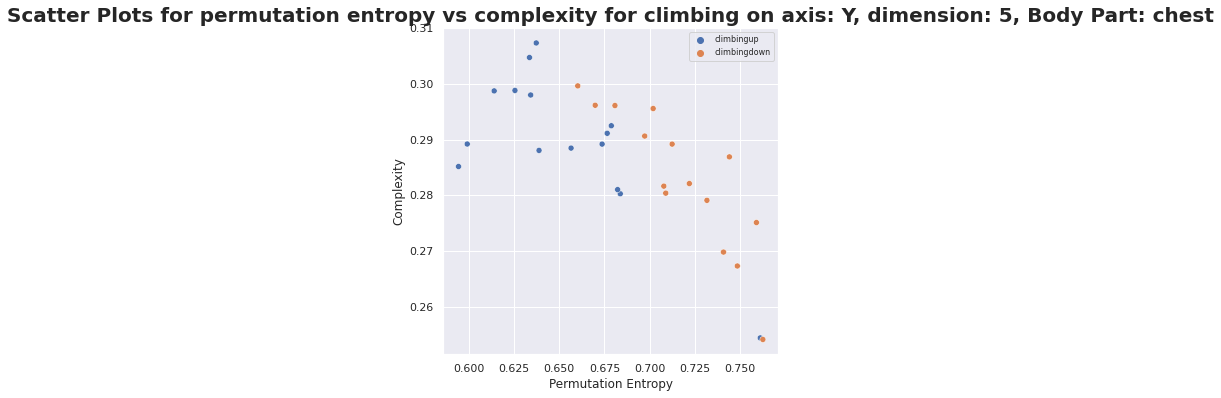

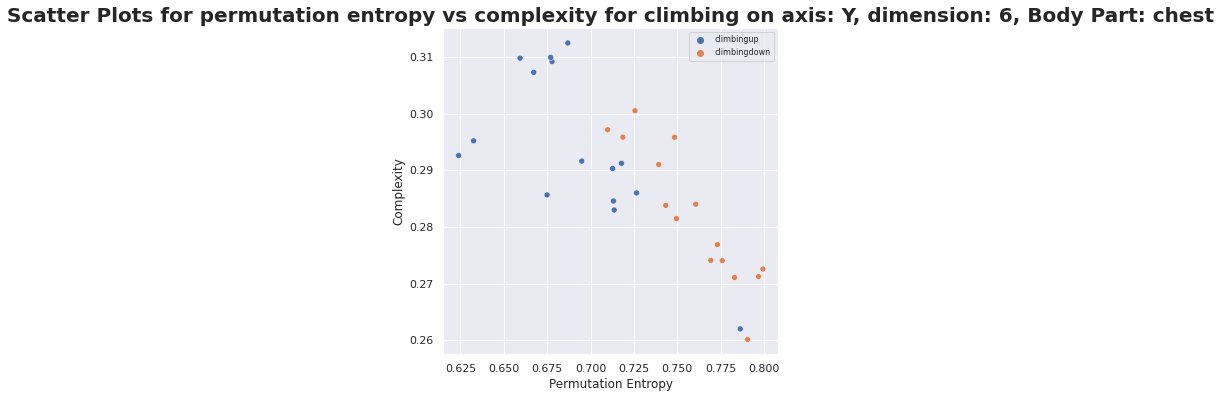

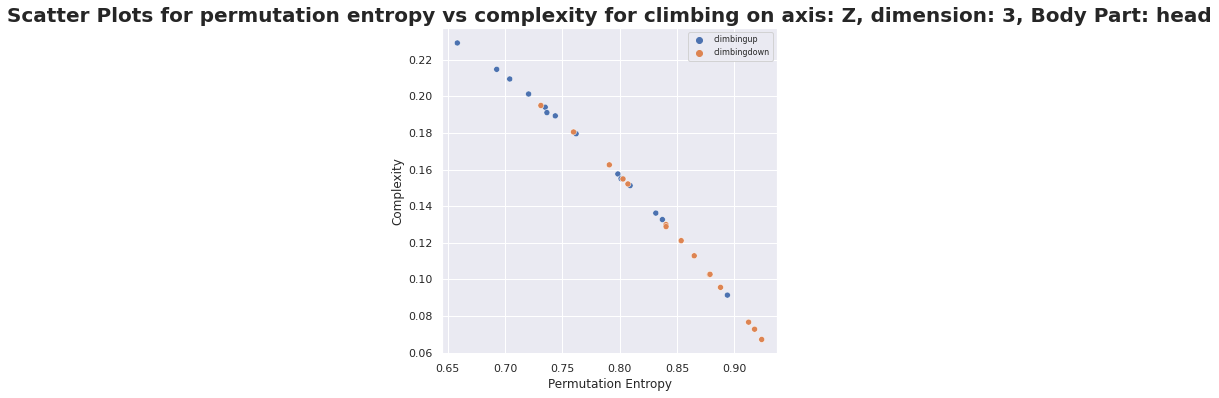

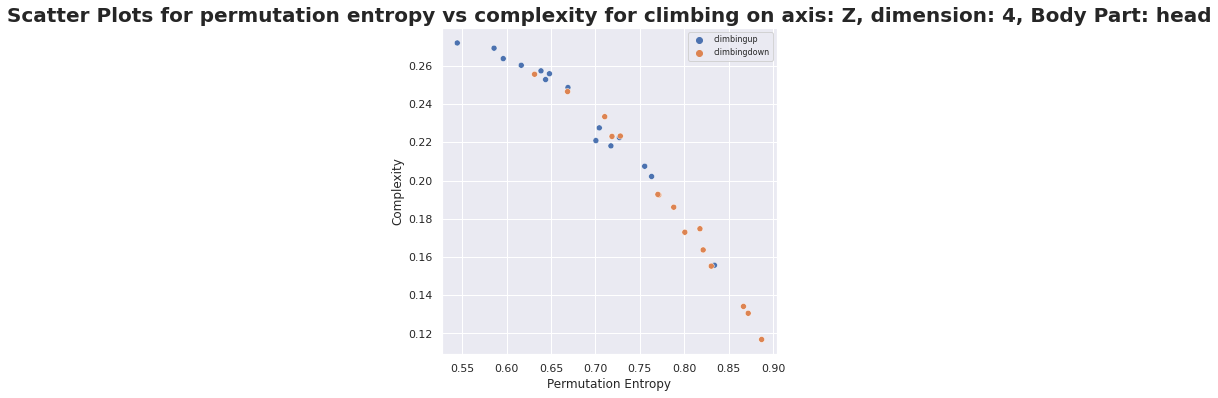

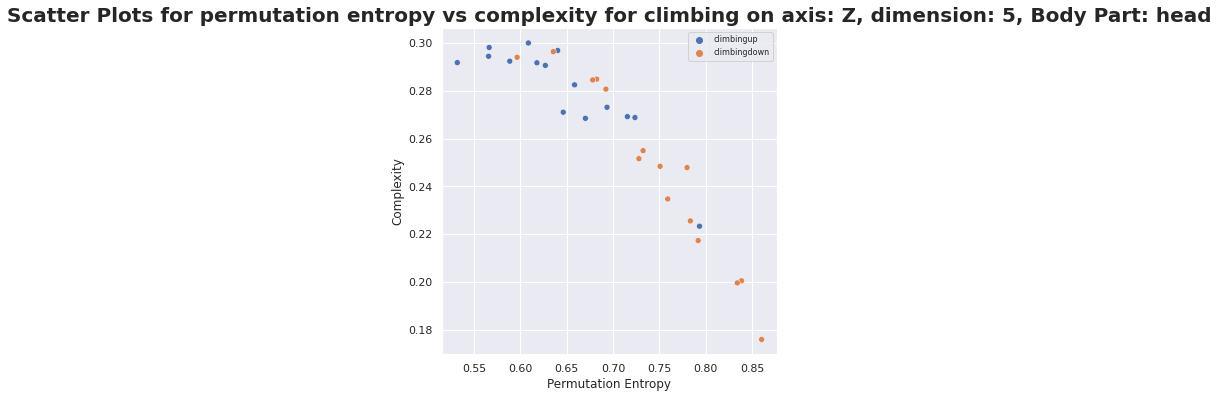

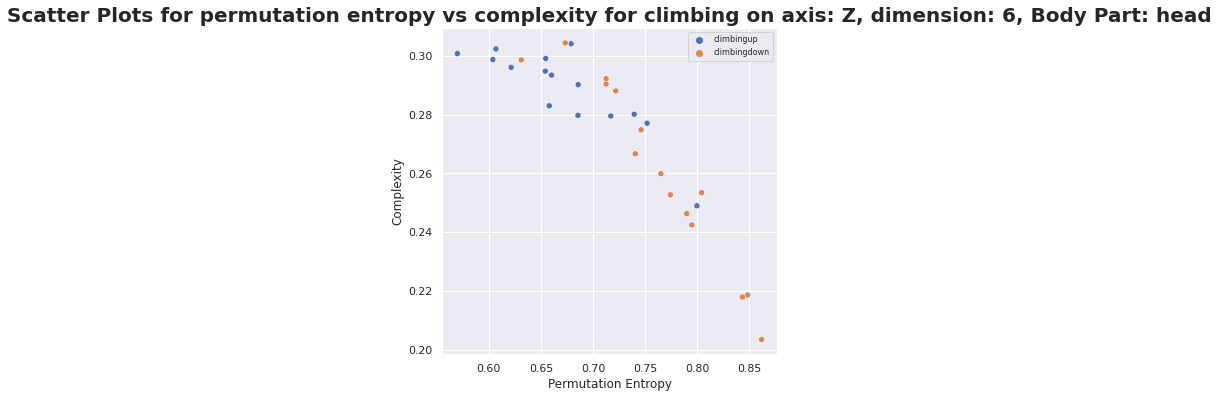

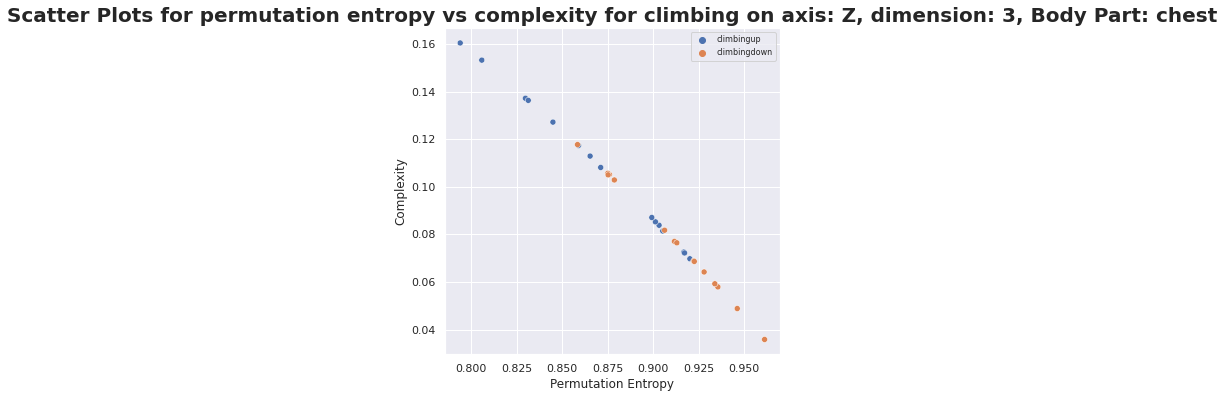

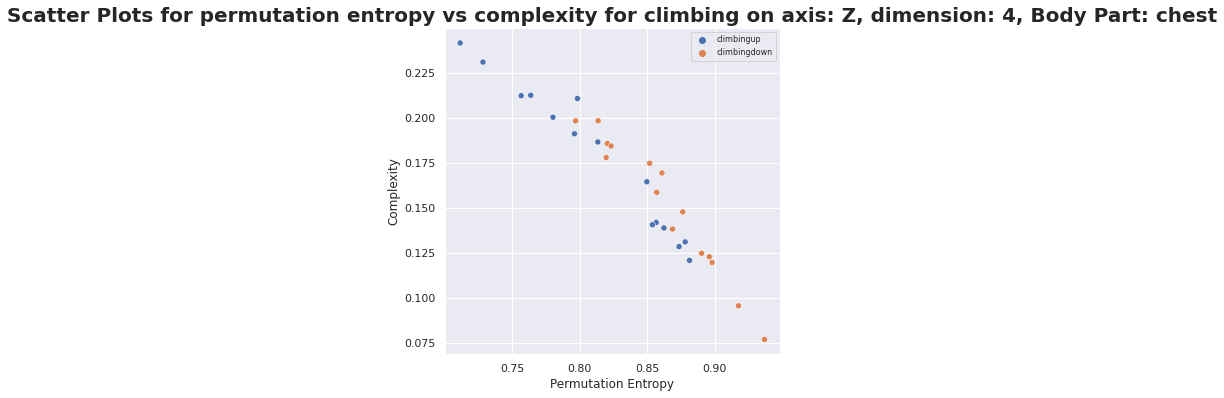

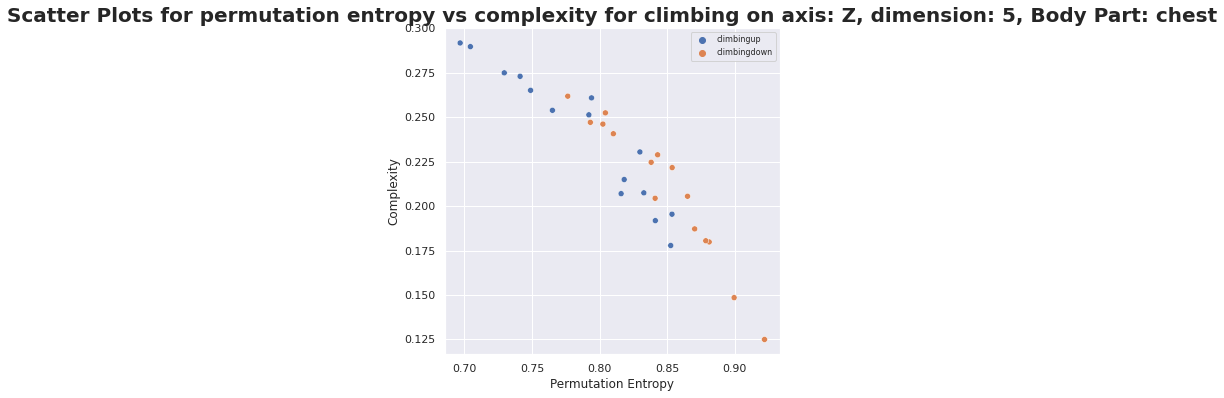

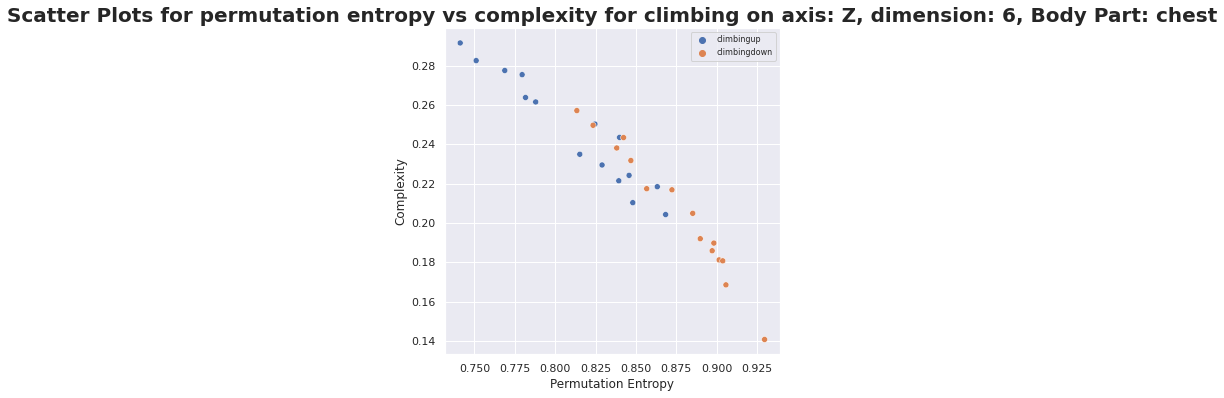

In [ ]:
##### Scatterplot for climbing up and climbing down #####

data_simple = df_task2[((df_task2['Activity'] == 'climbingdown') | (df_task2['Activity'] == 'climbingup')) & (df_task2['Signal Length'] == 4096) & (df_task2['Delay'] == 1)]

axis = ['x','y','z']
body_part = ['head','chest']
dim = [3,4,5,6]

for i in axis:
  full_ax = i.upper()
  for j in body_part:
    for k in dim: 
      test_frame = creating_df(data_simple,full_ax,j,k)
      plt.title(f'Scatter Plots for permutation entropy vs complexity for climbing on axis: {full_ax}, dimension: {k}, Body Part: {j}',fontweight="bold",fontsize=20)
      ploting_task2(test_frame)

In [ ]:
! jupyter nbconvert --to html Project_2_Group_3.ipynb

[NbConvertApp] WARNING | pattern 'Project_2_Group_3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execu